# **<h3 align="center">Data Mining 2024-25</h3>**
## **<h3 align="center">Customer Segmentation - ABCDEats Inc.</h3>**


**Group 10 members:**<br>Alexandra Pinto - 20211599@novaims.unl.pt - 20211599<br>
Marco Galão  - r20201545@novaims.unl.pt - r20201545<br>
Sven Goerdes - 20240503@novaims.unl.pt - 20240503<br>
Tim Straub  - 20240505@novaims.unl.pt - 20240505<br>

<a id = "toc"></a>

# Table of Contents

* [1. Import the Libraries](#import_libraries)
* [2. Import the Dataset](#import_dataset)
* [3. Description of the Dataset’s Structure](#dataset_structure)
* [4. Exploring the Dataset](#exploration)
    * [4.1. Constant Features](#constant_features)
    * [4.2. Duplicates](#duplicates)
    * [4.3. Missing Values](#missing_values)
    * [4.4. Data Types](#data_types)
    * [4.5. Coherence Checking](#coherence_checking)
        * [4.5.1. Minors Customers](#sub_section_4_5_1)
        * [4.5.2. Is_chain variable](##sub_section_4_5_2)
        * [4.5.3. CUI_Asian vs Japonese, Chinese](#sub_section_4_5_3)
        * [4.5.4. Last_order and First_order consistency](#sub_section_4_5_4)
        * [4.5.5. Sum DOWs vs sum HRs](##sub_section_4_5_5)
        * [4.5.6. Total Orders and Vendor Count consistency ](#sub_section_4_5_6)      
        * [4.5.7. Total rows with inconsistencies](#sub_section_4_5_7)
    * [4.6. Visualizations](#visualizations)
    * [4.7. Correlation Matrix](#correlation_matrix)
    * [4.8. Outliers](#outliers)
* [5. Feature Engineering](#feature_engineering)
    * [5.1. Generation](#generation)
    * [5.2. Total Cuisine Spending](#total_cuisine_spending)
    * [5.3. Healthiness Index](#healthiness_index)
    * [5.4. Weekend and Weekday Orders](#weekend_and_weekday_orders)
    * [5.5. Hourly Orders Aggregation](#hourly_orders_aggregation)
    * [5.6. Order Recency](#Order_Recency)
    * [5.7. Average Daily Orders](#Average_Daily_Orders)
    * [5.8. Average Order Value](#Average_Order_Value)
    * [5.9. Last Promotion Indicator](#last_promotion_indicator)
    * [5.10. Chain Orders Proportion](#chain_orders_proportion)
    * [5.11 Cities](#cities)



# 1. Import the Libraries <a class="anchor" id="import_libraries"></a>
[Back to ToC](#toc)<br>

For tasks involving data manipulation, numerical calculations, visualization, and machine learning, imports of libraries like the mentioned in the below cell are crucial. These libraries offer the required functions and tools for preprocessing data, pattern analysis, consumer segmentation, and development of focused marketing campaigns.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math

import warnings
warnings.filterwarnings("ignore")

# 2. Import the Dataset <a class="anchor" id="import_dataset"></a>
[Back to ToC](#toc)<br>

In this section, we import the datasets and set the customer_id as the index column in DM2425_ABCDEats_DATASET. Also, check the first and last 5 rows of the dataset.

In [4]:
df_original = pd.read_csv("../Data/DM2425_ABCDEats_DATASET.csv", index_col="customer_id")
df_original.head().T

customer_id,1b8f824d5e,5d272b9dcb,f6d1b2ba63,180c632ed8,4eb37a6705
customer_region,2360,8670,4660,4660,4660
customer_age,18.0,17.0,38.0,NaN,20.0
vendor_count,2,2,1,2,2
product_count,5,2,2,3,5
is_chain,1,2,2,1,0
first_order,0.0,0.0,0.0,0.0,0.0
last_order,1,1,1,2,2
last_promo,DELIVERY,DISCOUNT,DISCOUNT,DELIVERY,-
payment_method,DIGI,DIGI,CASH,DIGI,DIGI
CUI_American,0.0,12.82,9.2,0.0,14.57


In [5]:
df_original.tail().T

customer_id,f4e366c281,f6b6709018,f74ad8ce3f,f7b19c0241,fd40d3b0e0
customer_region,8670,8670,8670,8670,4660
customer_age,30.0,NaN,24.0,34.0,30.0
vendor_count,1,1,1,1,1
product_count,1,1,1,1,1
is_chain,1,0,1,0,0
first_order,NaN,NaN,NaN,NaN,NaN
last_order,0,0,0,0,0
last_promo,FREEBIE,DELIVERY,-,DISCOUNT,-
payment_method,DIGI,DIGI,DIGI,DIGI,CASH
CUI_American,0.0,18.04,0.0,0.0,0.0


# 3. Description of the Dataset’s Structure<a class="anchor" id="dataset_structure"></a>
[Back to ToC](#toc)<br>

Here, let's try to identify missing values, check if data types are appropriate and performs summary statistics.

In [6]:
df_original.shape

(31888, 55)

In [7]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31888 entries, 1b8f824d5e to fd40d3b0e0
Data columns (total 55 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_region           31888 non-null  object 
 1   customer_age              31161 non-null  float64
 2   vendor_count              31888 non-null  int64  
 3   product_count             31888 non-null  int64  
 4   is_chain                  31888 non-null  int64  
 5   first_order               31782 non-null  float64
 6   last_order                31888 non-null  int64  
 7   last_promo                31888 non-null  object 
 8   payment_method            31888 non-null  object 
 9   CUI_American              31888 non-null  float64
 10  CUI_Asian                 31888 non-null  float64
 11  CUI_Beverages             31888 non-null  float64
 12  CUI_Cafe                  31888 non-null  float64
 13  CUI_Chicken Dishes        31888 non-null  float64
 1

<br>
The <span style="color:Blue"> info()  </span> method prints information about the DataFrame. Using this method we can evaluate the following:

Missing values:
- customer_age
- first_order
- HR_0

Data types:
- customer_age should be a integer
- first_order is number of days so should be a integer

The <span style="color:Blue"> describe()  </span> method  is used for calculating some statistical data.

In [8]:
df_original.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
customer_age,31161.0,27.51,7.16,15.0,23.0,26.0,31.00,80.00
vendor_count,31888.0,3.10,2.77,0.0,1.0,2.0,4.00,41.00
product_count,31888.0,5.67,6.96,0.0,2.0,3.0,7.00,269.00
is_chain,31888.0,2.82,3.98,0.0,1.0,2.0,3.00,83.00
first_order,31782.0,28.48,24.11,0.0,7.0,22.0,45.00,90.00
last_order,31888.0,63.68,23.23,0.0,49.0,70.0,83.00,90.00
CUI_American,31888.0,4.88,11.65,0.0,0.0,0.0,5.66,280.21
CUI_Asian,31888.0,9.96,23.56,0.0,0.0,0.0,11.83,896.71
CUI_Beverages,31888.0,2.30,8.48,0.0,0.0,0.0,0.00,229.22
CUI_Cafe,31888.0,0.80,6.43,0.0,0.0,0.0,0.00,326.10


As we can see the HR_0 is always equal to zero, so we can delete this feature.

In [9]:
df_original.describe(include="object")

,customer_region,last_promo,payment_method
count,31888,31888,31888
unique,9,4,3
top,8670,-,CARD
freq,9761,16748,20161


Let's see the unique values that exist in categorical variables

In [10]:
(df_original["customer_region"].value_counts(normalize=True) * 100).round(2)

customer_region
8670    30.61
4660    29.95
2360    27.69
2440     4.65
4140     2.69
8370     1.55
2490     1.40
-        1.39
8550     0.08
Name: proportion, dtype: float64

In [11]:
(df_original["last_promo"].value_counts(normalize=True) * 100).round(2)

last_promo
-           52.52
DELIVERY    19.71
DISCOUNT    14.10
FREEBIE     13.67
Name: proportion, dtype: float64

Lets replace the - for None.

In [12]:
(df_original["payment_method"].value_counts(normalize=True) * 100).round(2)

payment_method
CARD    63.22
DIGI    19.13
CASH    17.64
Name: proportion, dtype: float64

So, there are hidden missing values in "customer_region" ("-") and we should evaluate what could mean "-" in "last_promo"

<a id = "exploration"></a>

# 4. Exploring the Dataset <a class="anchor" id="a"></a>
[Back to ToC](#toc)<br>

In this section we perform several checks and treatments to ensure data quality. <br>
This entails locating and managing duplicates to prevent redundant data, removing constant characteristics that don't offer insightful information, and dealing with missing values using methods like imputation or exclusion. These procedures are essential for preserving data integrity and enhancing the accuracy of later analysis and modeling efforts.

> ## 4.1. Constant features <a class="anchor" id="constant_features"></a>
[Back to 4. Exploring the Dataset](#exploration)<br>

The <span style='color:Blue'> var() </span> method allows us to check if there are any of the numerical variables are univariate (variance is equal to 0).

In [13]:
variances = df_original.var(numeric_only=True)
variances[variances == 0]

HR_0    0.0
dtype: float64

Let's drop the univariate feature "HR_0"

In [14]:
df_no_hr0 = df_original.drop("HR_0", axis = 1)

> ## 4.2. Duplicates <a class="anchor" id="duplicates"></a>
[Back to 4. Exploring the Dataset](#exploration)<br>

With the <span style="color:Blue"> drop_duplicates() </span> method the duplicates rows will be dropped. We can conclude that that this dataset had 60 duplicates.

Check for duplicated indexes

In [15]:
df_no_hr0.index.duplicated().sum()

13

In [16]:
df_no_duplicates = df_no_hr0[~df_no_hr0.index.duplicated(keep='first')]

In [17]:
df_no_duplicates.index.duplicated().sum()

0

Check for duplicated rows (without considering indexes)

In [18]:
df_no_duplicates.duplicated().sum()

47

In [19]:
df_no_duplicates.drop_duplicates(inplace=True)

In [20]:
df_no_duplicates.duplicated().sum()

0

In [21]:
df_no_duplicates.shape

(31828, 54)

**Conclusion:**

In [22]:
# Calculate the number of rows removed
rows_removed = len(df_no_hr0) - len(df_no_duplicates)

# Calculate the percentage of rows removed
percent_removed = (rows_removed / len(df_no_hr0)) * 100

# Print the results
print(f"Rows removed due to duplicates: {rows_removed} ({round(percent_removed, 2)}%)")

Rows removed due to duplicates: 60 (0.19%)


> ## 4.3. Missing values <a class="anchor" id="missing_values"></a>
[Back to 4. Exploring the Dataset](#exploration)<br>

As we concluded there are some features that have some missing values. In this subsection we will check for each feature and try to understand what would be the best approach.

In [23]:
df_treat_missing = df_no_duplicates.copy()

In [24]:
# Calculate the percentage of disguised missing values "-" in each column
perc_dash_values = (df_treat_missing.apply(lambda x: (x == '-').sum()) / len(df_treat_missing) * 100).round(2)
perc_dash_values[perc_dash_values > 0].sort_values(ascending=False)

last_promo         52.54
customer_region     1.39
dtype: float64

In [25]:
# Calculate percentage of missing values in each column
perc_missing_values = (df_treat_missing.isna().sum() / len(df_treat_missing) * 100).round(2)
perc_missing_values[perc_missing_values > 0].sort_values(ascending=False)

customer_age    2.28
first_order     0.33
dtype: float64

**last_promo**

Evaluate "-" values

In [26]:
(df_treat_missing["last_promo"].value_counts(normalize=True, ascending=False) * 100).round(2)

last_promo
-           52.54
DELIVERY    19.70
DISCOUNT    14.11
FREEBIE     13.65
Name: proportion, dtype: float64

Create new columns (and auxiliary variables with column names) to help creating visualizations

In [27]:
# New columns

# Select all columns that start with "CUI_"
cui_columns = df_treat_missing.filter(like="CUI_").columns.tolist()
dow_columns = df_treat_missing.filter(like="DOW_").columns.tolist()
hr_columns = df_treat_missing.filter(like="HR_").columns.tolist()

# Fill NaN values with 0 before summing
df_treat_missing["total_cui_spending"] = df_treat_missing[cui_columns].sum(axis=1)
df_treat_missing["total_orders"] = df_treat_missing[dow_columns].sum(axis=1)

# Auxiliary variables

# Define metric and non-metric features
metric_features = df_treat_missing.select_dtypes(include=['number']).columns.tolist()
non_metric_features = df_treat_missing.select_dtypes(exclude=['number']).columns.tolist()

# Exclude DOW and HR (and CUI) columns from metric features
metric_features_excluding_dow_and_hr = [feat for feat in metric_features if feat not in dow_columns + hr_columns]
metric_features_excluding_cui_dow_and_hr = [feat for feat in metric_features if feat not in cui_columns + dow_columns + hr_columns]

<br>
To improve the visualizations and maintain coherence across all of them, let's define a consistent color palette that will be applied throughout.

https://seaborn.pydata.org/tutorial/color_palettes.html#sequential-color-brewer-palettes

In [28]:
# Set color palette
color_palette = "Set2"

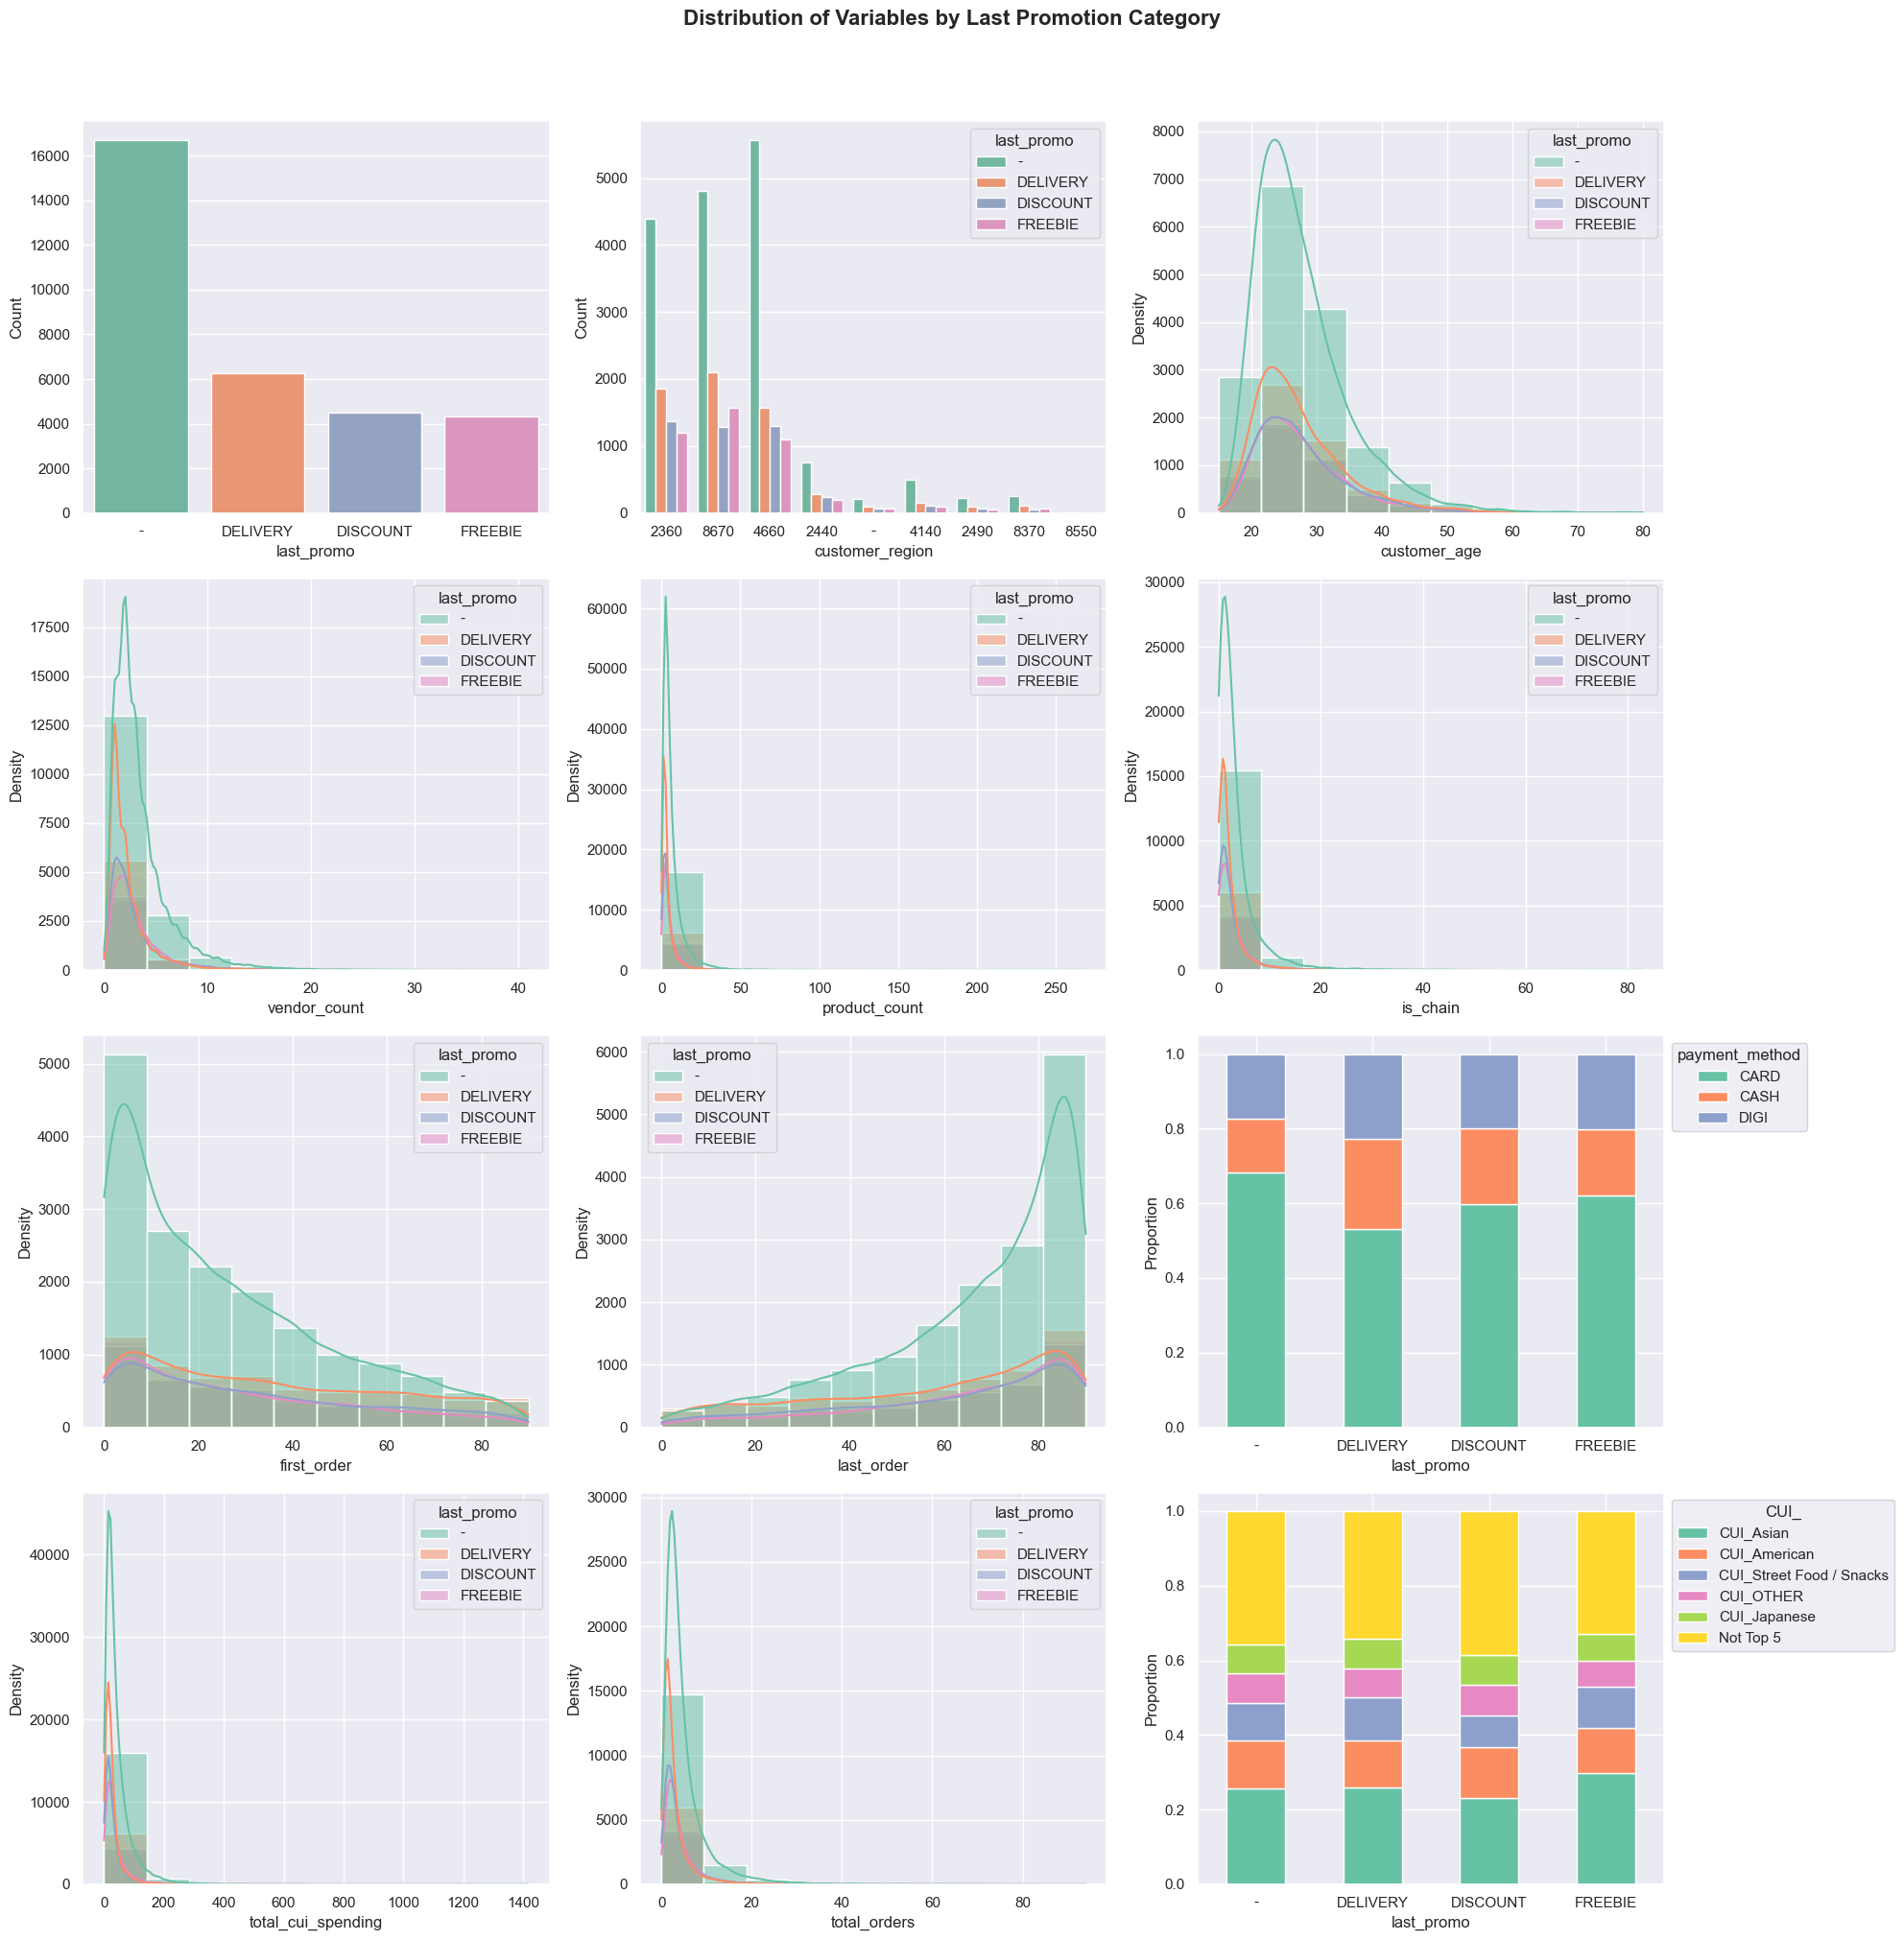

In [29]:
# Set seaborn style and color palette
sns.set()
sns.set_palette(color_palette)  # Consistent color palette across all plots

# Define order for last_promo categories based on frequency
last_promo_order = df_treat_missing['last_promo'].value_counts().index.tolist()

# Separate numeric and categorical variables
numeric_vars = df_treat_missing.select_dtypes(include=['number']).columns.tolist()
categorical_vars = df_treat_missing.select_dtypes(exclude=['number']).columns.tolist()

# Select variables to plot, excluding 'last_promo', CUI, DOW, and HR variables
variables_to_plot = [col for col in df_treat_missing.columns if col != 'last_promo' and not (col.startswith("CUI") or col.startswith("DOW") or col.startswith("HR"))]

# Calculate grid layout for subplots
total_features = len(variables_to_plot) + 2  # +2 for 'last_promo' and 'customer_region'
sp_rows = math.ceil(math.sqrt(total_features))
sp_cols = math.ceil(total_features / sp_rows)

# Prepare figure with specified grid layout
fig, axes = plt.subplots(sp_rows, sp_cols, figsize=(20, 20))
axes = axes.flatten()

# Plot 'last_promo' countplot with specified order
sns.countplot(data=df_treat_missing, x='last_promo', ax=axes[0], order=last_promo_order, palette=color_palette)
axes[0].set(xlabel="last_promo", ylabel="Count")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0, ha='center')  # Horizontal labels

# Loop through variables to plot each one
for ax, feat in zip(axes[1:], variables_to_plot):
    if feat == "customer_region":
        sns.countplot(data=df_treat_missing, x=feat, hue='last_promo', ax=ax, hue_order=last_promo_order)
        ax.set(xlabel="customer_region", ylabel="Count")
        ax.legend(title="last_promo", loc='upper right')  # Move legend inside the plot
        ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')  # Vertical labels
    elif feat in numeric_vars:
        sns.histplot(df_treat_missing, x=feat, ax=ax, bins=10, hue='last_promo', kde=True, hue_order=last_promo_order)
        ax.set(ylabel="Density")
        ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')  # Horizontal labels
    else:
        # For other categorical variables ("payment_method"), plot stacked bar chart
        stacked_data = df_treat_missing.groupby(['last_promo', feat]).size().unstack(fill_value=0)
        stacked_data = stacked_data.loc[last_promo_order]  # Reorder rows to match last_promo order
        stacked_data.div(stacked_data.sum(axis=1), axis=0).plot(kind='bar', stacked=True, ax=ax)
        ax.set(xlabel="last_promo", ylabel="Proportion")
        ax.legend(title=feat, bbox_to_anchor=(1, 1), loc='upper left')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')  # Horizontal labels

# Plot cuisine variables separately if they exist
cuisine_columns = [col for col in df_treat_missing.columns if col.startswith('CUI_')]
if cuisine_columns:
    cuisine_data = df_treat_missing.groupby('last_promo')[cuisine_columns].sum()
    cuisine_data = cuisine_data.loc[last_promo_order]  # Ensure the last_promo order is maintained
    cuisine_proportion = cuisine_data.div(cuisine_data.sum(axis=1), axis=0)
    
    # Select top 5 cuisines, others combined as 'Not Top 5'
    top_cuisines = cuisine_proportion.sum().nlargest(5).index
    combined_cuisines = cuisine_proportion[top_cuisines].copy()
    combined_cuisines['Not Top 5'] = cuisine_proportion.drop(top_cuisines, axis=1).sum(axis=1)
    
    # Plot combined cuisine data as stacked bar chart
    ax = axes[len(variables_to_plot) + 1]
    combined_cuisines.plot(kind='bar', stacked=True, ax=ax)
    ax.set(xlabel="last_promo", ylabel="Proportion")
    ax.legend(title='CUI_', bbox_to_anchor=(1, 1), loc='upper left')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')  # Horizontal labels

# Remove empty subplots
for ax in axes[len(variables_to_plot) + 2:]:
    fig.delaxes(ax)

# Layout and display
plt.suptitle("Distribution of Variables by Last Promotion Category", y=1.01, fontsize=16, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

**Conclusion:** All "last_promo" categories, including those labeled with “-”, display similar distribution shapes. This consistency across distributions suggests that the records marked with “-” are not random and likely represent a specific group of customers rather than missing data. Therefore, we can infer that they indicate customers who did not engage with any promotions. By doing so, we allow for more effective segmentation and insights into customer behavior.

In [30]:
df_treat_missing["last_promo"].replace("-", 'NOPROMO', inplace=True)

**customer_region**

Notes:
- Values could represent postal codes
- Check if customer region values with similar prefix indicate geographical proximity

In [31]:
(df_treat_missing["customer_region"].value_counts(normalize=True, ascending=False) * 100).round(2)

customer_region
8670    30.63
4660    29.95
2360    27.70
2440     4.66
4140     2.69
8370     1.56
2490     1.39
-        1.39
8550     0.04
Name: proportion, dtype: float64

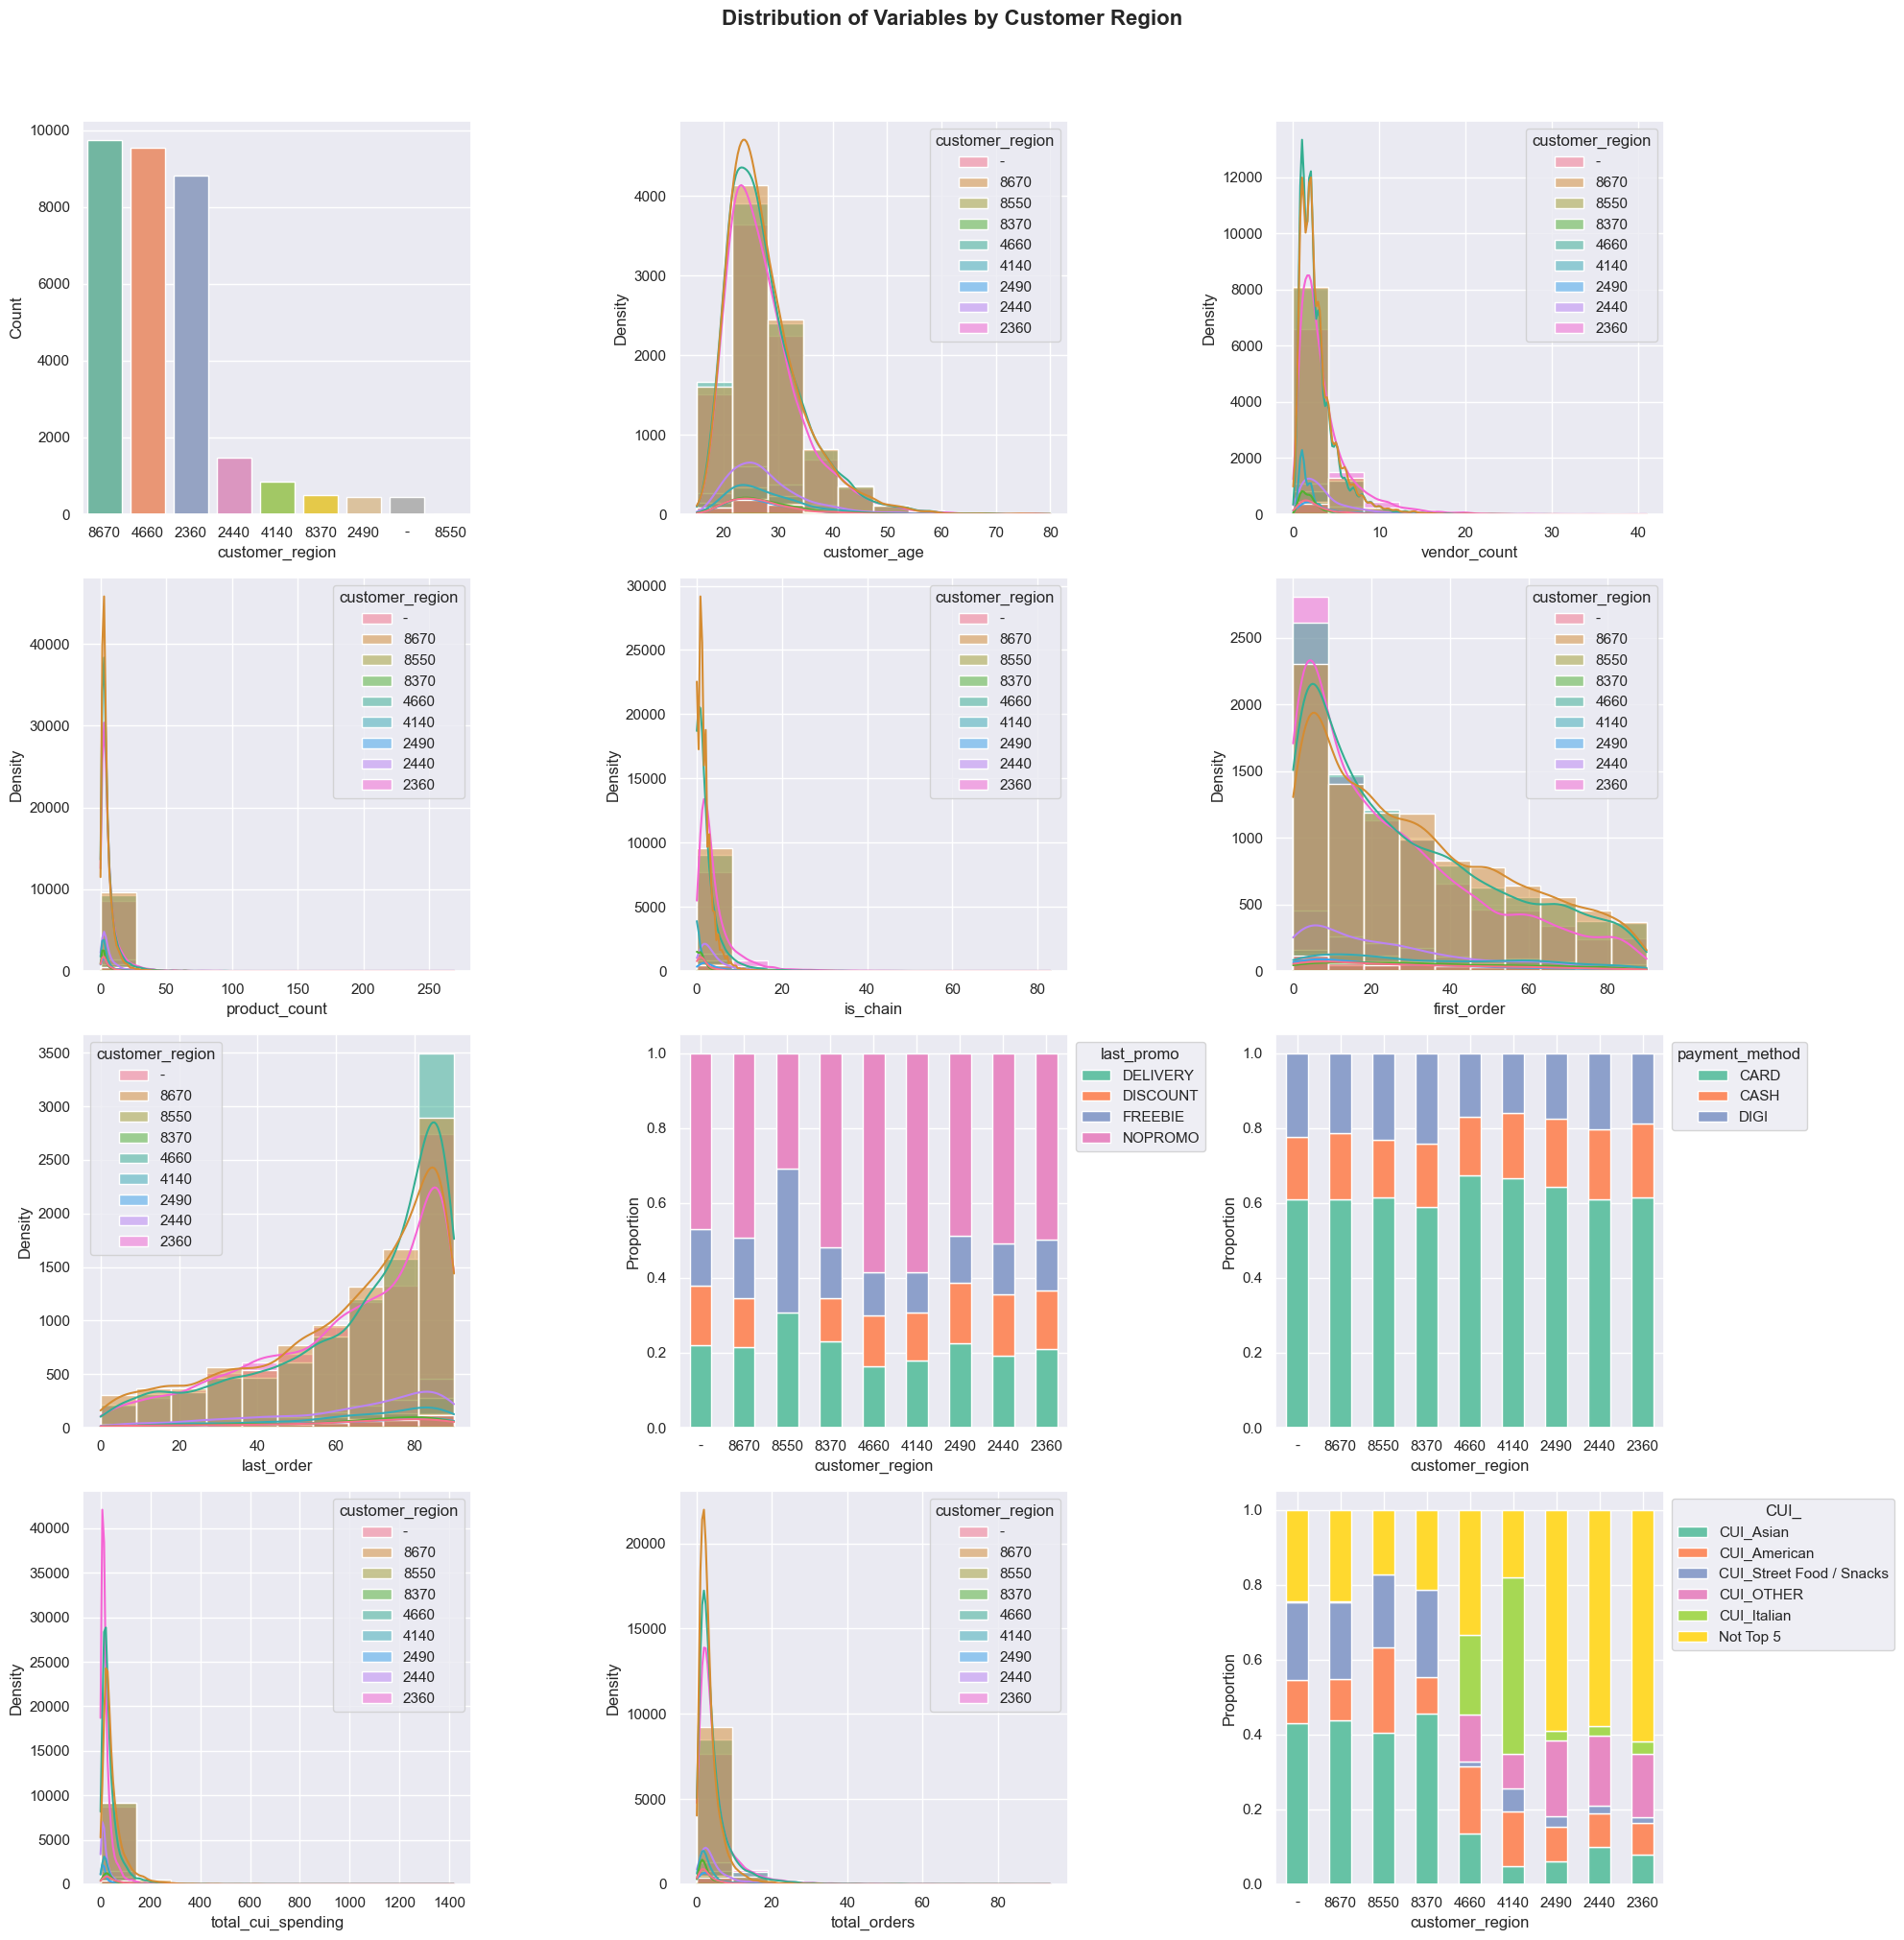

In [32]:
# Set seaborn style and color palette
sns.set()
sns.set_palette(color_palette)  # Consistent color palette across all plots

# Define order for customer_region categories based on frequency
customer_region_order = df_treat_missing['customer_region'].value_counts().index.tolist()

# Separate "-" from the rest and sort the others numerically in descending order
if "-" in customer_region_order:
    customer_region_order = ["-"] + sorted([region for region in customer_region_order if region != "-"], key=lambda x: int(x), reverse=True)

# Separate numeric and categorical variables
numeric_vars = df_treat_missing.select_dtypes(include=['number']).columns.tolist()
categorical_vars = df_treat_missing.select_dtypes(exclude=['number']).columns.tolist()

# Select variables to plot, excluding 'customer_region', CUI, DOW, and HR variables
variables_to_plot = [col for col in df_treat_missing.columns if col != 'customer_region' and not (col.startswith("CUI") or col.startswith("DOW") or col.startswith("HR"))]

# Calculate grid layout for subplots
total_features = len(variables_to_plot) + 2  # +2 for 'customer_region' and 'last_promo'
sp_rows = math.ceil(math.sqrt(total_features))
sp_cols = math.ceil(total_features / sp_rows)

# Prepare figure with specified grid layout
fig, axes = plt.subplots(sp_rows, sp_cols, figsize=(20, 20))
axes = axes.flatten()

# Plot 'customer_region' countplot with specified order
sns.countplot(data=df_treat_missing, x='customer_region', ax=axes[0], order=df_treat_missing['customer_region'].value_counts().index.tolist(), palette=color_palette)
axes[0].set(xlabel="customer_region", ylabel="Count")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0, ha='center')  # Horizontal labels

# Loop through variables to plot each one
for ax, feat in zip(axes[1:], variables_to_plot):
    if feat in numeric_vars:
        sns.histplot(df_treat_missing, x=feat, ax=ax, bins=10, hue='customer_region', kde=True, hue_order=customer_region_order)
        ax.set(ylabel="Density")
        ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')  # Horizontal labels
    else:
        # For other categorical variables, plot stacked bar chart
        stacked_data = df_treat_missing.groupby(['customer_region', feat]).size().unstack(fill_value=0)
        stacked_data = stacked_data.loc[customer_region_order]  # Reorder rows to match customer_region order
        stacked_data.div(stacked_data.sum(axis=1), axis=0).plot(kind='bar', stacked=True, ax=ax)
        ax.set(xlabel="customer_region", ylabel="Proportion")
        ax.legend(title=feat, bbox_to_anchor=(1, 1), loc='upper left')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')  # Horizontal labels

# Plot cuisine variables separately
cuisine_columns = [col for col in df_treat_missing.columns if col.startswith('CUI_')]
if cuisine_columns:
    cuisine_data = df_treat_missing.groupby('customer_region')[cuisine_columns].sum()
    cuisine_data = cuisine_data.loc[customer_region_order]  # Ensure the customer_region order is maintained
    cuisine_proportion = cuisine_data.div(cuisine_data.sum(axis=1), axis=0)
    
    # Select top 5 cuisines, others combined as 'Not Top 5'
    top_cuisines = cuisine_proportion.sum().nlargest(5).index
    combined_cuisines = cuisine_proportion[top_cuisines].copy()
    combined_cuisines['Not Top 5'] = cuisine_proportion.drop(top_cuisines, axis=1).sum(axis=1)
    
    # Plot combined cuisine data as stacked bar chart
    ax = axes[len(variables_to_plot) + 1]
    combined_cuisines.plot(kind='bar', stacked=True, ax=ax)
    ax.set(xlabel="customer_region", ylabel="Proportion")
    ax.legend(title='CUI_', bbox_to_anchor=(1, 1), loc='upper left')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')  # Horizontal labels

# Remove empty subplots
for ax in axes[len(variables_to_plot) + 2:]:
    fig.delaxes(ax)

# Layout and display
plt.suptitle("Distribution of Variables by Customer Region", y=1.01, fontsize=16, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

**Conclusion:** After analyzing the plots, it appears that customer region values with similar prefixes indicate geographical proximity, as they exhibit similar behavior and statistics. This observation aligns with the project description, which notes that the data was collected from three cities. 

1. **Group 1:**
   - 8670
   - 8550
   - 8370

2. **Group 2:**
   - 4660
   - 4140

3. **Group 3:**
   - 2490
   - 2440
   - 2360

Additionally, the customer region represented by `"-"` shares more similarities with the regions `8670` and `8370`. 

**Next steps:** The next step is to identify the customer region that is most similar to `"-"` (`8670` or `8370`).

In [33]:
# # Set seaborn style and color palette
# sns.set()
# sns.set_palette(color_palette)  # Consistent color palette across all plots

# # Define relevant regions
# regions = ['-', '8670', '8550', '8370']

# # Filter DataFrame for the selected regions
# df_selected = df_treat_missing[df_treat_missing['customer_region'].isin(regions)]

# # Sum spending for each cuisine type per region
# region_spending = df_selected.groupby('customer_region')[cui_columns].sum()

# # Calculate total spending percentages for each cuisine type by region
# region_percentages = region_spending.div(region_spending.sum(axis=1), axis=0) * 100

# # Calculate the percentage difference relative to customer_region '-'
# reference_region = '-'
# region_differences = region_percentages.loc[['8670', '8550', '8370']].subtract(region_percentages.loc[reference_region], axis=1)

# # Prepare DataFrame for plotting
# region_differences = region_differences.reset_index().melt(id_vars='customer_region', var_name='cuisine', value_name='percentage_difference')

# # Plot the difference in percentages compared to region '-'
# plt.figure(figsize=(10, 6))
# sns.barplot(data=region_differences, x='cuisine', y='percentage_difference', hue='customer_region', palette=color_palette, alpha=1.0)
# plt.title('Percentage Difference in Spending for Selected Cuisines by Region (Compared to "-")', fontsize=16, weight='bold')
# plt.ylabel('Percentage Difference')
# plt.xlabel('Cuisines')
# plt.xticks(rotation=0, ha='center')
# plt.legend(title='customer_region', bbox_to_anchor=(1, 1))

# # Layout and display
# plt.tight_layout(rect=[0, 0, 1, 0.98])
# plt.show()

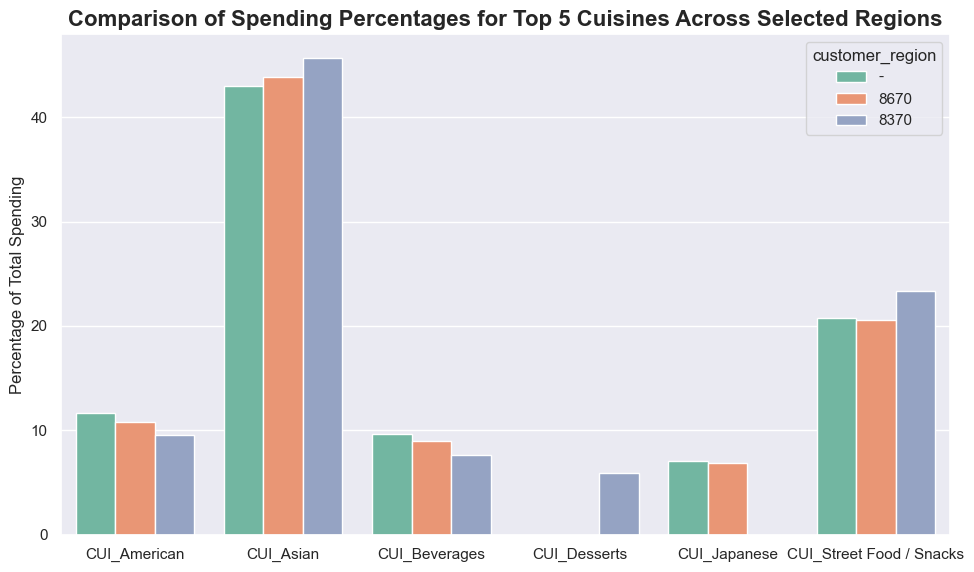

In [34]:
# Set seaborn style and color palette
sns.set()
sns.set_palette(color_palette)  # Consistent color palette across all plots

# Define relevant regions
regions = ['-', '8670', '8370']

# Filter DataFrame for the selected regions
df_selected = df_treat_missing[df_treat_missing['customer_region'].isin(regions)]

# Sum spending for each cuisine type per region
region_spending = df_selected.groupby('customer_region')[cui_columns].sum()

# Calculate total spending percentages for each cuisine type by region
region_percentages = region_spending.div(region_spending.sum(axis=1), axis=0) * 100

# Create a comparison DataFrame for the top 5 cuisines per region
top_cuisine_percentages = {}

for region in regions:
    top_cuisines = region_spending.loc[region].nlargest(5).index
    top_percentages = region_percentages.loc[region, top_cuisines]
    top_cuisine_percentages[region] = top_percentages

# Convert to DataFrame
comparison_df = pd.DataFrame(top_cuisine_percentages).reset_index().melt(id_vars='index', var_name='customer_region', value_name='percentage')

# Plot using Seaborn's countplot to visualize the top cuisines by region
plt.figure(figsize=(10, 6))
sns.barplot(data=comparison_df, x='index', y='percentage', hue='customer_region', palette=color_palette, alpha=1.0)
plt.title('Comparison of Spending Percentages for Top 5 Cuisines Across Selected Regions', fontsize=16, weight='bold')
plt.ylabel('Percentage of Total Spending')
plt.xlabel('')
plt.xticks(rotation=0, ha='center')
plt.legend(title='customer_region', bbox_to_anchor=(1, 1))

# Layout and display
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

The visualization suggests that customers from the empty region `-` are geographically close to those in region `8670`. Therefore, we will reassign the region for all customers classified under `-` to `8670`.

**Note:** In the future, we will use KNN to replace the values represented by "-" with the mode of the nearest neighbors.

In [35]:
df_treat_missing['customer_region'].replace('-', '8670', inplace=True)

**customer_age**

In [36]:
# Calculate percentage of missing values in "customer_age"
perc_missing_customer_age = (df_treat_missing["customer_age"].isna().sum() / len(df_treat_missing) * 100).round(2)

# Print percentage of missing values
print(f"{perc_missing_customer_age}%")

2.28%


In [37]:
nan_age = df_treat_missing[df_treat_missing['customer_age'].isna()]
nan_age[metric_features_excluding_cui_dow_and_hr].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
customer_age,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vendor_count,727.0,3.17,2.58,1.00,1.00,2.00,4.00,18.00
product_count,727.0,5.95,6.99,1.00,2.00,4.00,7.00,68.00
is_chain,727.0,3.00,3.96,0.00,1.00,2.00,4.00,43.00
first_order,725.0,27.51,23.74,0.00,7.00,21.00,43.00,89.00
last_order,727.0,65.17,22.37,0.00,51.00,72.00,83.50,90.00
total_cui_spending,727.0,40.38,50.11,1.14,13.39,24.72,44.27,606.84
total_orders,727.0,4.57,5.14,1.00,2.00,3.00,5.00,53.00


In [38]:
nan_age.describe(include='object').T

,count,unique,top,freq
customer_region,727,7,2360,220
last_promo,727,4,NOPROMO,412
payment_method,727,3,CARD,463


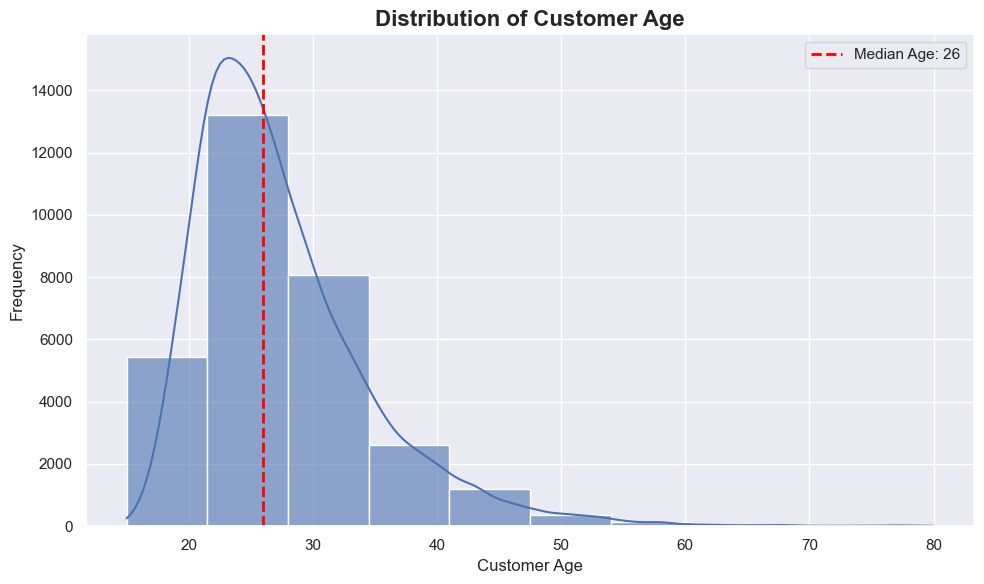

In [39]:
# Set seaborn style
sns.set()

# Assuming 'df_treat_missing' contains the relevant data and 'customer_age' is one of the columns
plt.figure(figsize=(10, 6))

# Create the histogram
sns.histplot(df_treat_missing['customer_age'], bins=10, kde=True, alpha=0.6)

# Calculate the median age and add a vertical line
median_age = df_treat_missing['customer_age'].median()
plt.axvline(median_age, color='red', linestyle='--', linewidth=2, label=f'Median Age: {round(median_age)}')

# Set titles and labels
plt.title('Distribution of Customer Age', fontsize=16, weight='bold')
plt.xlabel('Customer Age')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

**Conclusion:** The analysis of descriptive statistics for the relevant variables revealed no significant standout features. With only 2.28% of data missing, we will impute the missing customer ages using the median (the median is robust to outliers and provides a more accurate reflection of a typical value, especially in skewed distributions).

In [40]:
df_treat_missing['customer_age'].fillna(median_age, inplace=True)

**Future:** Try with KNN

In [41]:
# from sklearn.impute import KNNImputer
# from sklearn.preprocessing import LabelEncoder, StandardScaler

# # Make a copy of the dataframe
# df_kNN_impute = df_treat_missing.copy()

# # Store the original index
# original_index = df_kNN_impute.index

# # Get categorical columns
# categorical_columns = df_kNN_impute.select_dtypes(include=['object', 'category']).columns.tolist()

# # Dictionary to store label encoders
# label_encoders = {}

# # Encode categorical variables
# for col in categorical_columns:
#     # Convert categorical column to string type first
#     df_kNN_impute[col] = df_kNN_impute[col].astype(str)
    
#     # Replace 'nan' strings with 'MISSING'
#     df_kNN_impute[col] = df_kNN_impute[col].replace('nan', 'MISSING')
    
#     le = LabelEncoder()
#     df_kNN_impute[col] = le.fit_transform(df_kNN_impute[col])
#     label_encoders[col] = le

# # Scale numerical columns
# numerical_columns = df_kNN_impute.select_dtypes(include=['int64', 'float64']).columns.tolist()
# scaler = StandardScaler()
# df_kNN_impute[numerical_columns] = scaler.fit_transform(df_kNN_impute[numerical_columns])

# # Initialize and fit KNN imputer
# imputer = KNNImputer(n_neighbors=5)
# imputed_array = imputer.fit_transform(df_kNN_impute)

# # Convert back to dataframe with original index
# df_imputed = pd.DataFrame(imputed_array, columns=df_kNN_impute.columns, index=original_index)

# # Inverse transform numerical columns
# df_imputed[numerical_columns] = scaler.inverse_transform(df_imputed[numerical_columns])

# # Inverse transform categorical columns
# for col in categorical_columns:
#     df_imputed[col] = label_encoders[col].inverse_transform(df_imputed[col].astype(int))
#     # If the original column was categorical, convert back to category type
#     if df_treat_missing[col].dtype.name == 'category':
#         df_imputed[col] = pd.Categorical(df_imputed[col], categories=df_treat_missing[col].cat.categories)

# # Now let's compare the values before and after imputation
# print("Original missing values:", df_treat_missing['customer_age'].isna().sum())
# print("Remaining missing values:", df_imputed['customer_age'].isna().sum())

# # Get the original indices where customer_age was NaN
# nan_indices = df_treat_missing[df_treat_missing['customer_age'].isna()].index

# # Create a comparison DataFrame
# comparison_df = pd.DataFrame({
#     'Original': df_treat_missing['customer_age'][nan_indices],
#     'Imputed': df_imputed['customer_age'][nan_indices]
# })

# # Round imputed values to 2 decimal places for better readability
# comparison_df['Imputed'] = comparison_df['Imputed'].round(2)

# # Show the comparison
# print("\nComparison of NaN values before and after imputation:")
# print(comparison_df)

# df_treat_missing['customer_age'] = df_imputed['customer_age']

**first_order**

In [42]:
# Calculate percentage of missing values in "first_order"
perc_missing_first_order = (df_treat_missing["first_order"].isna().sum() / len(df_treat_missing) * 100).round(2)

# Print percentage of missing values
print(f"{perc_missing_first_order}%")

0.33%


In [43]:
nan_first_order = df_treat_missing[df_treat_missing['first_order'].isna()]
nan_first_order[metric_features_excluding_cui_dow_and_hr].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
customer_age,106.0,28.75,7.42,18.0,23.00,27.50,32.00,60.00
vendor_count,106.0,1.02,0.14,1.0,1.00,1.00,1.00,2.00
product_count,106.0,1.31,0.72,1.0,1.00,1.00,1.75,7.00
is_chain,106.0,0.57,0.52,0.0,0.00,1.00,1.00,2.00
first_order,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last_order,106.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00
total_cui_spending,106.0,14.23,12.41,1.0,6.14,12.08,18.84,105.55
total_orders,106.0,1.02,0.14,1.0,1.00,1.00,1.00,2.00


In [44]:
nan_first_order.describe(include='object').T

,count,unique,top,freq
customer_region,106,6,8670,50
last_promo,106,4,DELIVERY,37
payment_method,106,3,CARD,44


In [45]:
# Filter the DataFrame based on 'vendor_count' condition
filtered_nan_first_order = nan_first_order[nan_first_order['total_orders'] != 1]

# Select the relevant features the DataFrame
filtered_nan_first_order[metric_features_excluding_cui_dow_and_hr + dow_columns].T

customer_id,1f9cd0d268,c3690a6fa1
customer_age,30.00,27.00
vendor_count,2.00,2.00
product_count,2.00,7.00
is_chain,2.00,1.00
first_order,NaN,NaN
last_order,0.00,0.00
total_cui_spending,4.08,105.55
total_orders,2.00,2.00
DOW_0,0.00,0.00
DOW_1,0.00,0.00


In [46]:
# Calculate the percentage of those customers in the DataFrame
percentage_filtered = len(filtered_nan_first_order) / len(df_treat_missing) * 100

# Print percentage
print(f"Filtered customers make up {round(percentage_filtered, 2)}% of the dataset.")

Filtered customers make up 0.01% of the dataset.


**Conclusion:** Since most customers with missing first_order data have last_order = 0 and total_orders = 1, we know they placed only one order on the first day of the dataset. Therefore, we can confidently impute first_order as 0 for these cases.

For the two customers with total_orders = 2, while they placed their orders on DOW_6 with two vendors, it’s possible that these orders occurred across different Saturdays. Given this minor ambiguity affects only 0.01% of the data, we can remove these cases without significantly impacting the dataset’s integrity.

In [47]:
# Update `first_order` with `last_order` for all customers with missing `first_order`
df_treat_missing.loc[nan_first_order.index, 'first_order'] = df_treat_missing.loc[nan_first_order.index, 'last_order']

# Identify customers, with missing `first_order`, where `total_orders` is different than 1
customers_to_remove = nan_first_order[nan_first_order['total_orders'] != 1].index

# Drop the two customers with missing `first_order` and `total_orders` different than 1
df_treat_missing.drop(index=customers_to_remove, inplace=True)

**Conclusion:**

In [48]:
df_treat_missing.isna().sum().sum()

0

In [49]:
# Calculate the number of rows removed due to missing values
rows_removed_due_to_missing = len(df_no_duplicates) - len(df_treat_missing)

# Calculate the percentage of rows removed
percent_rows_removed_due_to_missing = rows_removed_due_to_missing / len(df_no_duplicates) * 100

# Calculate the number of values imputed
values_imputed = df_no_duplicates.isna().sum().sum() - df_treat_missing.isna().sum().sum()
percent_values_imputed = (values_imputed / df_treat_missing.size) * 100

# Print the results
print(f"Rows removed due to missing values: {rows_removed_due_to_missing} ({round(percent_rows_removed_due_to_missing, 2)}%)")
print(f"Values imputed due to missing data: {values_imputed} ({round(percent_values_imputed, 2)}%)")

Rows removed due to missing values: 2 (0.01%)
Values imputed due to missing data: 833 (0.05%)


> ## 4.4. Data Types <a class="anchor" id="data_types"></a>
[Back to 4. Exploring the Dataset](#exploration)<br>

In [50]:
df_adjust_dtypes = df_treat_missing.copy()
df_adjust_dtypes.dtypes

customer_region              object
customer_age                float64
vendor_count                  int64
product_count                 int64
is_chain                      int64
first_order                 float64
last_order                    int64
last_promo                   object
payment_method               object
CUI_American                float64
CUI_Asian                   float64
CUI_Beverages               float64
CUI_Cafe                    float64
CUI_Chicken Dishes          float64
CUI_Chinese                 float64
CUI_Desserts                float64
CUI_Healthy                 float64
CUI_Indian                  float64
CUI_Italian                 float64
CUI_Japanese                float64
CUI_Noodle Dishes           float64
CUI_OTHER                   float64
CUI_Street Food / Snacks    float64
CUI_Thai                    float64
DOW_0                         int64
DOW_1                         int64
DOW_2                         int64
DOW_3                       

**Notes:**
- age: should be integer
- first order: is number of days so should also be integer

In [51]:
# Using "Int64" allows for the representation of NaN values alongside integers
df_adjust_dtypes["customer_age"] = df_adjust_dtypes["customer_age"].astype("Int64")
df_adjust_dtypes["first_order"] = df_adjust_dtypes["first_order"].astype("Int64")

> ## 4.5. Coherence Checking <a class="anchor" id="coherence_checking"></a>
[Back to 4. Exploring the Dataset](#exploration)<br>

> ### 4.5.1. Minors Customers <a class="anchor" id="sub_section_4_5_1"></a>

In [52]:
df_inconsistencies = df_adjust_dtypes.copy()

Verify if there are minor customers (should not exist, because they are not allowed to placed orders online)

In [53]:
# Check the age distribution
df_inconsistencies["customer_age"].describe()

count      31826.0
mean     27.473858
std       7.085639
min           15.0
25%           23.0
50%           26.0
75%           31.0
max           80.0
Name: customer_age, dtype: Float64

In [54]:
# Count customers under 18
minor_customers = df_inconsistencies[df_inconsistencies["customer_age"] < 18]
perc_minor_customers = len(minor_customers) / len(df_inconsistencies) * 100

print(f"Number of customers under 18 years old: {len(minor_customers)} ({round(perc_minor_customers, 2)}%)")

# Show descriptive statistics
minor_customers[metric_features_excluding_cui_dow_and_hr].describe().round(2).T

Number of customers under 18 years old: 365 (1.15%)


,count,mean,std,min,25%,50%,75%,max
customer_age,365.0,16.68,0.57,15.0,16.0,17.0,17.0,17.0
vendor_count,365.0,2.97,2.53,0.0,1.0,2.0,4.0,18.0
product_count,365.0,5.35,6.73,0.0,2.0,3.0,6.0,75.0
is_chain,365.0,2.76,5.1,0.0,1.0,1.0,3.0,75.0
first_order,365.0,29.16,23.73,0.0,10.0,23.0,46.0,89.0
last_order,365.0,62.57,23.85,1.0,48.0,69.0,83.0,90.0
total_cui_spending,365.0,34.53,35.72,0.0,11.96,23.19,41.2,205.54
total_orders,365.0,4.24,5.79,0.0,1.0,3.0,5.0,75.0


In [55]:
minor_customers.describe(include="object")

,customer_region,last_promo,payment_method
count,365,365,365
unique,7,4,3
top,8670,NOPROMO,CARD
freq,112,194,228


**Conclusion:** Since only 1.15% of customers in the dataset are minors, who are not legally permitted to place online orders, we can remove these entries. Excluding minors from the dataset will improve the accuracy and relevance of our analysis for the target demographic.

In [56]:
# Remove customers under 18 from the dataset
df_inconsistencies = df_inconsistencies[df_inconsistencies["customer_age"] >= 18]

> ### 4.5.4. Last_order and First_order consistency <a class="anchor" id="sub_section_4_5_4"></a>

Verify that last_order is lower than or equal to first_order for each customer

In [57]:
# Drop rows with missing values in "first_order" ("last_order" has no missing values)
data_cleaned = df_inconsistencies.dropna(subset="first_order")

# Check when "last_order" is greater than "first_order"
is_last_order_lower = data_cleaned["last_order"] < data_cleaned["first_order"]

# Calculate the percentage of inconsistent rows based on the original dataframe
perc_inconsistencies = is_last_order_lower.sum() / len(df_inconsistencies) * 100

# Output the percentage of rows where "last_order" is greater than "first_order"
print(f"Inconsistent rows ('last_order' < 'first_order'): {perc_inconsistencies.round(2)}%")

Inconsistent rows ('last_order' < 'first_order'): 0.0%


> ### 4.5.3. CUI_Asian vs Chinese, Indian, Japanese, etc <a class="anchor" id="sub_section_4_5_3"></a>

The classification of restaurants into broad and specific cuisine categories ('CUI_Asian' alongside 'CUI_Asian', 'CUI_Chinese', 'CUI_Indian', 'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_Thai') could lead to inconsistencies and overlaps in data. Some restaurants may be categorized under both a broad category ('CUI_Asian') and a specific one (e.g., 'CUI_Chinese'), while others might only fall under the broader classification. This double classification could result in redundancy, making it challenging to analyze customer preferences and spending habits accurately.

To explore this issue, we can analyze the following:

- Correlation Analysis: How strongly correlated are the specific categories with the broader CUI_Asian category?
- Frequency of Overlap: How often do entries fall under both CUI_Asian and specific categories?

In [58]:
cui_columns

['CUI_American',
 'CUI_Asian',
 'CUI_Beverages',
 'CUI_Cafe',
 'CUI_Chicken Dishes',
 'CUI_Chinese',
 'CUI_Desserts',
 'CUI_Healthy',
 'CUI_Indian',
 'CUI_Italian',
 'CUI_Japanese',
 'CUI_Noodle Dishes',
 'CUI_OTHER',
 'CUI_Street Food / Snacks',
 'CUI_Thai']

In [59]:
# Define the cuisine categories to analyze
asian_cui = ['CUI_Asian', 'CUI_Chinese', 'CUI_Indian', 'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_Thai']

# Create a binary DataFrame indicating whether there is spending on each cuisine
cuisine_presence = df_inconsistencies[asian_cui].gt(0).astype(int)

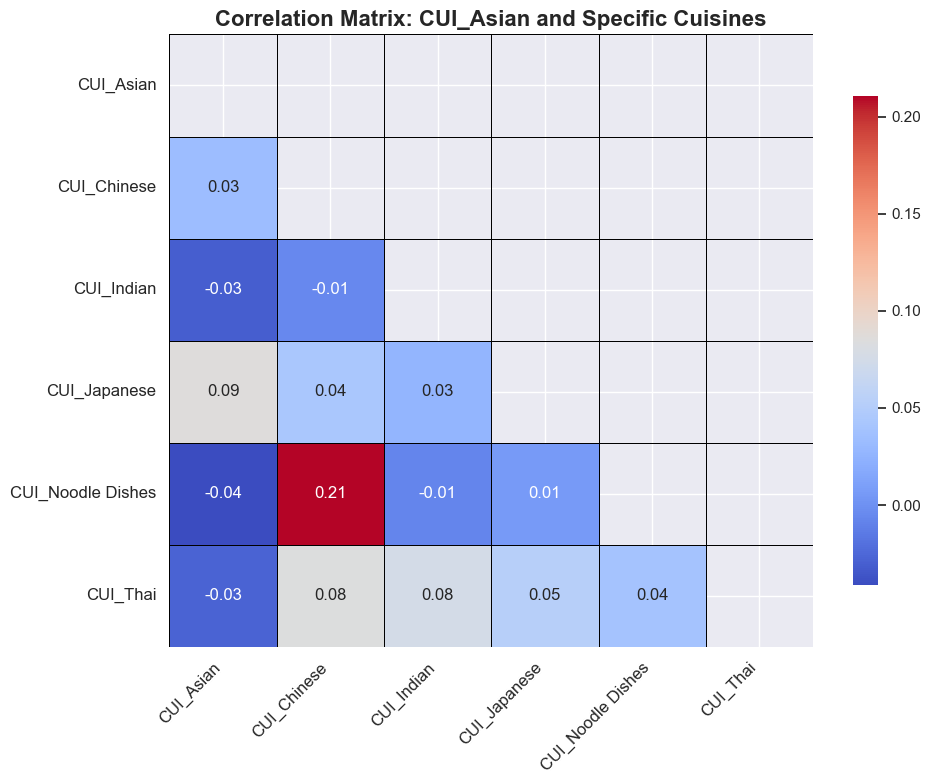

In [60]:
# Set the seaborn theme and color palette for consistency
sns.set()

# Correlation Analysis between CUI_Asian and specific categories
# Create a correlation matrix
correlation_matrix = df_inconsistencies[asian_cui].corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            mask=mask, 
            annot=True, 
            cmap='coolwarm', 
            fmt=".2f", 
            linewidths=0.5,  # Add lines between cells for clarity
            linecolor='black',  # Color of the lines
            cbar_kws={"shrink": .8})  # Adjust colorbar size

# Set labels and title
plt.title('Correlation Matrix: CUI_Asian and Specific Cuisines', fontsize=16, weight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x labels for better readability
plt.yticks(rotation=0, fontsize=12)  # Keep y labels horizontal

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [61]:
# Count the number of entries with spending on each specific cuisine and CUI_Asian
overlap_counts = cuisine_presence[cuisine_presence['CUI_Asian'] == 1].sum()

# Create a comparison DataFrame with overlap counts and total non-zero counts for each specific cuisine
comparison_df = pd.DataFrame({
    'Overlap_Count': overlap_counts[1:],  # Get overlap counts for specific cuisines
    'Non_Zero_Count': (cuisine_presence[asian_cui[1:]].sum()).values  # Sum for non-zero counts
})

# Calculate total spending for each cuisine
total_spending = df_inconsistencies[asian_cui].sum()

# Add total spending to the comparison DataFrame
comparison_df['Total_Spending'] = total_spending[1:]  # Total spending for specific cuisines

# Calculate the percentage spent on each specific cuisine relative to CUI_Asian spending in overlapping cases
cui_asian_spending = total_spending['CUI_Asian']
comparison_df['Overlap_Spending_Percentage'] = (comparison_df['Total_Spending'] / cui_asian_spending) * 100

# Calculate the proportion of overlap compared to total non-zero counts
comparison_df['Overlap_Count_Percentage'] = (comparison_df['Overlap_Count'] / comparison_df['Non_Zero_Count']) * 100

# Replace any potential division by zero with NaN for clarity
comparison_df['Overlap_Spending_Percentage'].replace([float('inf'), -float('inf')], pd.NA, inplace=True)
comparison_df['Overlap_Count_Percentage'].replace([float('inf'), -float('inf')], pd.NA, inplace=True)

# Sorting the DataFrame by Overlap_Count_Percentage in descending order
comparison_df.sort_values(by='Overlap_Count_Percentage', ascending=False, inplace=True)

# Display the improved DataFrame
comparison_df[['Overlap_Count_Percentage', 'Overlap_Spending_Percentage']].round(2)

,Overlap_Count_Percentage,Overlap_Spending_Percentage
CUI_Japanese,40.67,30.08
CUI_Chinese,36.89,14.35
CUI_Thai,30.20,8.44
CUI_Noodle Dishes,27.78,7.19
CUI_Indian,26.24,16.32


In [62]:
# List of specific Asian cuisines
specific_cuisines = asian_cui[1:]

# Create an auxiliary DataFrame from the original
auxiliary_df = df_inconsistencies.copy()

# Calculate total spending for specific cuisines in the auxiliary DataFrame
auxiliary_df['Total_Specific_Cuisines'] = auxiliary_df[specific_cuisines].sum(axis=1)

# Check if the totals match (CUI_Asian from original DataFrame)
auxiliary_df['CUI_Match'] = auxiliary_df['CUI_Asian'] == auxiliary_df['Total_Specific_Cuisines']

# Display rows where the sums do not match
mismatched_entries = auxiliary_df[~auxiliary_df['CUI_Match']]

# Calculate the percentage of mismatched entries
mismatched_percentage = len(mismatched_entries) / len(auxiliary_df) * 100

# Output the results including percentage
print(f"Found {len(mismatched_entries)} ({mismatched_percentage:.2f}%) mismatched entries.")

mismatched_entries[['CUI_Asian', 'Total_Specific_Cuisines']].head()

Found 20792 (66.09%) mismatched entries.


,CUI_Asian,Total_Specific_Cuisines
customer_id,,
1b8f824d5e,0.00,28.88
180c632ed8,13.70,17.86
4eb37a6705,40.87,0.00
6aef2b6726,24.92,0.00
84775a7237,32.48,0.00


**Conclusion:** The analysis revealed 20,792 mismatched entries, representing approximately 66.09% of the dataset. This substantial discrepancy indicates inconsistencies in the categorization of restaurants. Specifically, some restaurants are classified solely under the broad category of CUI_Asian, while others are tagged under both CUI_Asian and one or more specific cuisine categories. Therefore, mismatched entries don't necessarily indicate an error but rather a complex categorization approach that requires careful interpretation.

> ### 4.5.5. Sum DOWs vs sum HRs <a class="anchor" id="sub_section_4_5_5"></a>

Check that the sum of orders by day (DOW_0 to DOW_6) matches the total number of orders from hourly data (HR_1 to HR_23)

In [63]:
# Sum of DOW columns
dow_sum = df_inconsistencies[dow_columns].sum(axis=1)

# Sum of HR columns
hr_sum = df_inconsistencies[hr_columns].sum(axis=1)

# Calculate the absolute difference between the sums of DOW and HR columns
sums_diff = (dow_sum - hr_sum).abs()

# Calculate the percentage of inconsistent rows (for printing purposes)
perc_rows_inconsistencies = (sums_diff > 0).mean() * 100

# Calculate the percentage of rows for each unique difference value
diff_counts = sums_diff.value_counts(normalize=True).sort_index() * 100

# Calculate the cumulative percentage
cumulative_percentage = diff_counts.cumsum()

# Create a DataFrame to display the percentage of rows with each deviation and cumulative percentages
results_df = pd.DataFrame({
    'Rows (%)': diff_counts.round(2),
    'Cumulative Rows (%)': cumulative_percentage.round(2)
})

# Set the index to the deviation (difference between DOW and HR sums)
results_df.index.name = 'Deviation (dow_sum - hr_sum)'

# Print the results with descriptions
print(f"Percentage of inconsistent rows: {perc_rows_inconsistencies.round(2)}%")

print("\nPercentage of differences between DOW and HR sums:")
results_df

Percentage of inconsistent rows: 3.66%

Percentage of differences between DOW and HR sums:


,Rows (%),Cumulative Rows (%)
Deviation (dow_sum - hr_sum),,
0,96.34,96.34
1,2.94,99.28
2,0.50,99.77
3,0.12,99.90
4,0.05,99.95
5,0.03,99.97
6,0.01,99.98
7,0.00,99.98
8,0.00,99.98


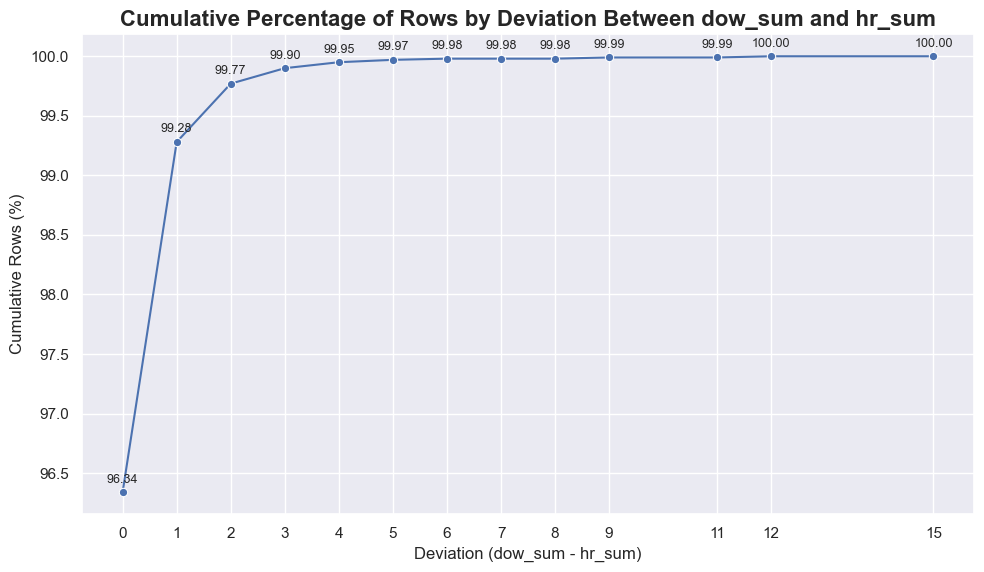

In [64]:
# Set seaborn style and color palette to match previous visualizations
sns.set()

# Data for Deviation and Cumulative Rows Percentage
deviations = results_df.index  # Deviation (dow_sum - hr_sum)
cumulative_rows = results_df['Cumulative Rows (%)']  # Cumulative Rows (%)

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(x=deviations, y=cumulative_rows, marker='o', color='b')

# Titles and labels
plt.title("Cumulative Percentage of Rows by Deviation Between dow_sum and hr_sum", fontsize=16, weight='bold')
plt.xlabel("Deviation (dow_sum - hr_sum)", fontsize=12)
plt.ylabel("Cumulative Rows (%)", fontsize=12)

# Improve x-axis ticks to show all deviation values
plt.xticks(ticks=deviations)

# Add value labels on top of each point for clarity
for x, y in zip(deviations, cumulative_rows):
    plt.text(x, y + 0.08, f"{y:.2f}", ha='center', fontsize=9)

# Grid for better readability
plt.grid(True)

# Layout adjustments
plt.tight_layout(rect=[0, 0, 1, 0.98])

# Show the plot
plt.show()

Proposed approach to handle these inconsistencies:

Small Inconsistencies (1-2 Orders):
- Carefully investigate patterns or potential causes, as these inconsistencies make up the majority of the discrepancies
- If no clear pattern is found, we will consider creating an aggregate feature (e.g., total_orders) that captures the sum of orders from either DOW or HR columns, to ensure consistency

Large Inconsistencies (3+ Orders):
- Investigate these cases in more detail to identify any potential issues
- If no clear pattern is found, we will remove these rows to maintain data integrity without heavily impacting the analysis, as they represent a small portion of the dataset

Lets analyze the small inconsistencies

In [65]:
# Rows where the sums are inconsistent
df_small_inconsistencies = df_inconsistencies[(sums_diff == 1) | (sums_diff == 2)]

# Get summary statistics of the inconsistent rows
df_small_inconsistencies.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_age,1082.0,27.550832,6.795799,18.0,23.0,26.0,31.0,69.0
vendor_count,1082.0,4.841959,3.831798,1.0,2.0,4.0,6.0,32.0
product_count,1082.0,9.050832,8.815521,1.0,3.0,6.0,11.0,83.0
is_chain,1082.0,4.160813,4.877028,0.0,1.0,3.0,5.0,47.0
first_order,1082.0,21.192237,20.284608,0.0,5.0,15.0,33.0,90.0
last_order,1082.0,69.334566,20.69958,0.0,60.0,77.0,85.0,90.0
CUI_American,1082.0,9.212957,16.338077,0.0,0.0,0.0,12.2975,176.07
CUI_Asian,1082.0,25.599316,42.303767,0.0,0.0,6.175,36.2075,380.4
CUI_Beverages,1082.0,3.746414,11.355755,0.0,0.0,0.0,2.4225,192.43
CUI_Cafe,1082.0,0.874917,8.588138,0.0,0.0,0.0,0.0,176.77


In [66]:
# Get statistics of the small inconsistent rows (for categorical variables)
df_small_inconsistencies.describe(include="object")

,customer_region,last_promo,payment_method
count,1082,1082,1082
unique,8,4,3
top,8670,NOPROMO,CARD
freq,565,636,769


In [67]:
df_small_inconsistencies.head().T

customer_id,ae38da6386,a21a839c77,9237d23413,8c6ffd7357,67c6c9f9c4
customer_region,8670,4140,8670,4660,4660
customer_age,21,19,22,25,24
vendor_count,2,1,3,3,1
product_count,3,4,4,4,3
is_chain,1,4,2,1,0
first_order,0,0,0,0,0
last_order,7,21,27,28,36
last_promo,DELIVERY,NOPROMO,NOPROMO,NOPROMO,FREEBIE
payment_method,DIGI,CARD,CARD,CARD,DIGI
CUI_American,0.0,0.0,5.77,27.54,0.0


**Conclusion:** Small Inconsistencies (1-2 Orders): No clear pattern was found, so we will consider creating an aggregate feature (e.g., total_orders) that captures the sum of orders from either DOW or HR columns, to ensure consistency

Lets analyze the large inconsistencies

In [68]:
# Rows where the sums are inconsistent
df_large_inconsistencies = df_inconsistencies[sums_diff > 2]

# Get summary statistics of the inconsistent rows
df_large_inconsistencies.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_age,71.0,28.323944,8.304516,18.0,23.0,26.0,31.0,72.0
vendor_count,71.0,8.704225,6.463954,1.0,4.0,7.0,12.0,30.0
product_count,71.0,21.422535,16.982901,3.0,10.0,16.0,26.5,88.0
is_chain,71.0,10.352113,12.499256,0.0,3.5,7.0,14.0,80.0
first_order,71.0,13.394366,15.411942,0.0,2.0,7.0,19.0,75.0
last_order,71.0,79.774648,12.819848,17.0,78.0,85.0,88.0,90.0
CUI_American,71.0,12.309296,19.677266,0.0,0.0,2.76,18.57,98.94
CUI_Asian,71.0,69.410282,85.238303,0.0,0.0,42.79,107.79,394.31
CUI_Beverages,71.0,11.100423,25.747199,0.0,0.0,0.0,12.84,176.38
CUI_Cafe,71.0,0.734085,5.885195,0.0,0.0,0.0,0.0,49.56


In [69]:
# Get statistics of the small inconsistent rows (for categorical variables)
df_large_inconsistencies.describe(include="object")

,customer_region,last_promo,payment_method
count,71,71,71
unique,6,4,3
top,8670,NOPROMO,CARD
freq,43,48,52


In [70]:
df_large_inconsistencies.head().T

customer_id,eb4664b1ac,2fb255fc89,0077c28499,4e3c4b0af3,dfc175d249
customer_region,2490,8670,8670,8670,8670
customer_age,39,29,29,23,30
vendor_count,5,7,30,10,6
product_count,31,30,64,26,11
is_chain,25,18,17,14,2
first_order,0,0,0,0,0
last_order,69,79,81,87,87
last_promo,NOPROMO,NOPROMO,NOPROMO,DELIVERY,NOPROMO
payment_method,CARD,CARD,CARD,CARD,CARD
CUI_American,0.0,43.19,30.24,5.93,0.0


**Conclusion:** Large Inconsistencies (3+ Orders): No clear pattern was found, so let's remove these rows

In [71]:
# Remove ows with inconsistencies greater than 2
df_inconsistencies = df_inconsistencies[~(sums_diff > 2)]

> ### 4.5.2. Is_chain variable <a class="anchor" id="sub_section_4_5_2"></a>

In [72]:
df_inconsistencies["is_chain"].describe()

count    31390.000000
mean         2.803249
std          3.907232
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         83.000000
Name: is_chain, dtype: float64

* is_chain is described, in the metadata, as a boolean variable that indicates whether the customer’s order was from a chain restaurant.
     * This can't be true as one row describes one customer 
     * --> Hypothesis: Tracks the number of orders a customer placed from a chain restaurant

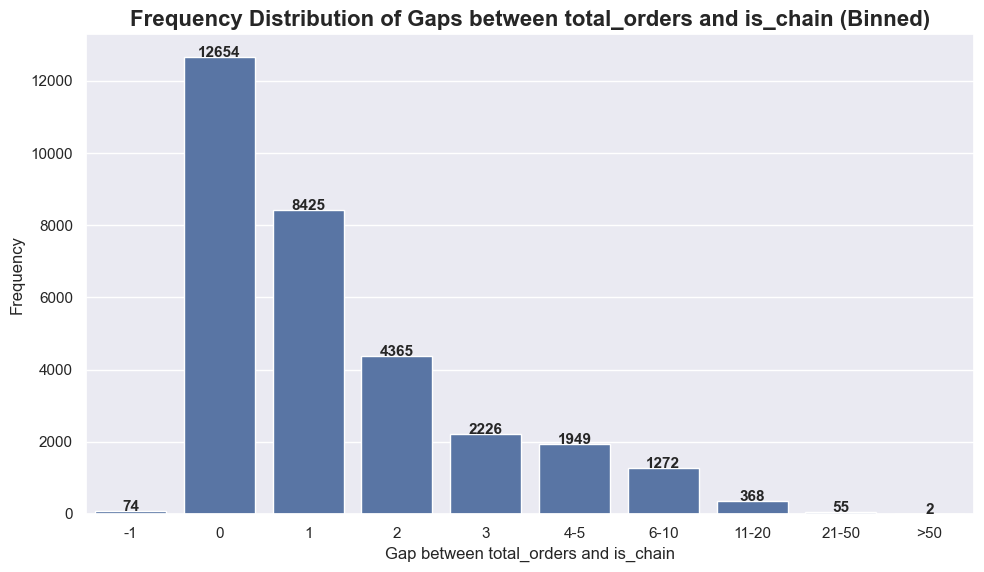

In [73]:
# Set seaborn style and color palette
sns.set()

# create a new variable/series that tracks the the gap between total orders and is_chain
gap = df_inconsistencies['total_orders'] - df_inconsistencies['is_chain']

# Define bin edges and labels to cover a wider range of gaps more intuitively
bin_edges = [-float('inf'), -1, 0, 1, 2, 3, 5, 10, 20, 50, float('inf')]
bin_labels = ["-1", "0", "1", "2", "3", "4-5", "6-10", "11-20", "21-50", ">50"]

# Bin the data using pd.cut with the new edges and labels
gap_binned = pd.cut(gap, bins=bin_edges, labels=bin_labels)

# Create a DataFrame with the binned values and count occurrences
gap_val_binned = pd.DataFrame(gap_binned.value_counts().sort_index(), columns=['count'])
gap_val_binned.index.name = 'gap'

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x=gap_val_binned.index, y=gap_val_binned['count'])

# Add value labels on top of each bar with a larger font size and a bit more space above each bar
for idx, value in enumerate(gap_val_binned['count']):
    plt.text(x=idx, y=value + 2, s=f"{value}", ha='center', fontsize=11, fontweight='bold')

# Set labels and title
plt.xlabel('Gap between total_orders and is_chain', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Frequency Distribution of Gaps between total_orders and is_chain (Binned)', 
          fontsize=16, weight='bold')

# Layout and display
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

**Conclusion:** Based on our previous analysis, the variable "is_chain" appears to represent the number of orders a customer has placed from chain restaurants, considering the observed range and distribution of the gaps. To enhance our understanding of customer behavior, we will create a **new feature called chain_orders_prop**, which will capture the frequency of a customer’s orders from chain restaurants as a proportion of their total orders.

In [74]:
# Rename the column 'is_chain' to 'chain_orders'
df_inconsistencies.rename(columns={'is_chain': 'chain_orders'}, inplace=True)

In [75]:
# Redefine auxiliary variables, because "is_chain" was renamed to "chain_orders"

# Define metric and non-metric features
metric_features = df_inconsistencies.select_dtypes(include=['number']).columns.tolist()
non_metric_features = df_inconsistencies.select_dtypes(exclude=['number']).columns.tolist()

# Exclude DOW and HR (and CUI) columns from metric features
metric_features_excluding_dow_and_hr = [feat for feat in metric_features if feat not in dow_columns + hr_columns]
metric_features_excluding_cui_dow_and_hr = [feat for feat in metric_features if feat not in cui_columns + dow_columns + hr_columns]

Analyze cases where "chain_orders" is greater than "total_orders"

In [76]:
# Identify rows where chain_orders is greater than total_orders
inconsistencies = df_inconsistencies[df_inconsistencies['chain_orders'] > df_inconsistencies['total_orders']]

# Calculate the percentage of inconsistent rows
percentage_inconsistencies = len(inconsistencies) / len(df_inconsistencies) * 100

# Display the percentage of inconsistent rows
print(f"Rows where 'chain_orders' exceeds 'total_orders': {len(inconsistencies)} ({percentage_inconsistencies:.2f}%)")

# Display the inconsistent rows summary
inconsistencies[metric_features_excluding_cui_dow_and_hr].describe().round(2).T

Rows where 'chain_orders' exceeds 'total_orders': 74 (0.24%)


,count,mean,std,min,25%,50%,75%,max
customer_age,74.0,26.19,5.81,18.0,21.0,25.5,30.0,46.0
vendor_count,74.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
product_count,74.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
chain_orders,74.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
first_order,74.0,43.08,25.67,1.0,22.25,40.0,64.0,89.0
last_order,74.0,43.08,25.67,1.0,22.25,40.0,64.0,89.0
total_cui_spending,74.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
total_orders,74.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Conclusion:** We found 74 entries (0.24%) where chain_orders exceed total_orders. These records are customers who have not placed any orders in the last three months. Therefore, we can set their chain_orders to match total_orders, which is 0.

In [77]:
# Handle these observations, by setting "chain_orders" to "total_orders"
df_inconsistencies.loc[df_inconsistencies['chain_orders'] > df_inconsistencies['total_orders'], 'chain_orders'] = df_inconsistencies['total_orders']

> ### 4.5.6. Total Orders and Vendor Count consistency <a class="anchor" id="sub_section_4_5_6"></a>

Total Orders Consistency: The total number of orders placed (the sum of the DOW/HR columns) should not exceed the total number of products ordered (product_count).<br>

Vendor Count Consistency: The vendor_count should not exceed the number of unique products ordered, since each product should come from a vendor. This ensures that the recorded count of unique vendors matches the reality of product purchases.

In [78]:
# Calculate total orders based on DOW columns
total_orders = df_inconsistencies[dow_columns].sum(axis=1)

# Check if total orders are less than product count
inconsistent_orders = total_orders > df_inconsistencies['product_count']

# Check if vendor count exceeds product count
inconsistent_vendors = df_inconsistencies['vendor_count'] > df_inconsistencies['product_count']

# Combine both conditions to find all inconsistencies
inconsistencies_mask = inconsistent_orders | inconsistent_vendors

# Count the number of inconsistent rows
num_inconsistent_rows = inconsistencies_mask.sum()

# Calculate the percentage of inconsistent rows
perc_inconsistent_rows = num_inconsistent_rows / len(df_inconsistencies) * 100

# Display results
print(f"Number of inconsistent rows: {num_inconsistent_rows} ({perc_inconsistent_rows.round(2)}%)")

Number of inconsistent rows: 18 (0.06%)


Check if the rows with inconsistencies in orders and vendors are the same

In [79]:
# Check if the indices of both inconsistency sets are the same
inconsistent_rows_same = inconsistent_orders.index.equals(inconsistent_vendors.index)

# Step 2: Output the result
if inconsistent_rows_same:
    print("The rows with inconsistencies in orders and vendors are the same.")
else:
    print("There are differences in the rows with inconsistencies between orders and vendors.")

The rows with inconsistencies in orders and vendors are the same.


In [80]:
df_inconsistencies[inconsistencies_mask].head().T

customer_id,aed85972bb,b2ebe2e6e0,6f723d9894,9d74f2ac81,27b7eed8fa
customer_region,4660,4660,4660,4660,4660
customer_age,27,43,36,27,35
vendor_count,1,1,1,1,1
product_count,0,0,0,0,0
chain_orders,0,0,0,0,0
first_order,6,6,13,19,20
last_order,6,6,13,19,20
last_promo,DISCOUNT,NOPROMO,DELIVERY,DELIVERY,DISCOUNT
payment_method,CARD,CARD,CASH,CARD,DIGI
CUI_American,0.0,0.0,0.0,0.0,0.0


In [81]:
# Remove rows with inconsistencies in total orders or vendor count
df_inconsistencies = df_inconsistencies[~inconsistencies_mask]

> ### 4.5.7. Total rows with inconsistencies <a class="anchor" id="sub_section_4_5_7"></a>
Final Step: Calculate the Percentage of Rows Removed Due to Inconsistencies

In [82]:
# Calculate the number of rows removed
rows_removed_inconsistencies = len(df_adjust_dtypes) - len(df_inconsistencies)
rows_removed_missing_and_inconsistencies = len(df_no_duplicates) - len(df_inconsistencies)

# Calculate the percentage of rows removed
percentage_removed_inconsistencies = rows_removed_inconsistencies / len(df_adjust_dtypes) * 100
percentage_removed_missing_and_inconsistencies = rows_removed_missing_and_inconsistencies / len(df_no_duplicates) * 100

# Output the result
print(f"Rows removed due to inconsistencies: {rows_removed_inconsistencies} ({round(percentage_removed_inconsistencies, 2)}%)")
print(f"Rows removed due to missing values and inconsistencies: {rows_removed_missing_and_inconsistencies} ({round(percentage_removed_missing_and_inconsistencies, 2)}%)")

Rows removed due to inconsistencies: 454 (1.43%)
Rows removed due to missing values and inconsistencies: 456 (1.43%)


**Conclusion:** We removed 454 rows (1.43%) due to inconsistencies (and an additional 2 rows due to missing values). This slight reduction in data maintains the overall integrity of the dataset, enhancing its reliability for analysis.

> ## 4.6. Visualizations <a class="anchor" id="visualizations"></a>
[Back to 4. Exploring the Dataset](#exploration)<br>

Default colormaps from matplotlib: https://matplotlib.org/stable/users/explain/colors/colormaps.html

Matplotlib tutorials: https://matplotlib.org/stable/tutorials/index.html

Matplotlib gallery: https://matplotlib.org/stable/gallery/index.html

Seaborn tutorials: https://seaborn.pydata.org/tutorial.html

Seaborn gallery: https://seaborn.pydata.org/examples/index.html

In [83]:
df_visualizations = df_inconsistencies.copy()

In [84]:
df_visualizations.columns

Index(['customer_region', 'customer_age', 'vendor_count', 'product_count',
       'chain_orders', 'first_order', 'last_order', 'last_promo',
       'payment_method', 'CUI_American', 'CUI_Asian', 'CUI_Beverages',
       'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts',
       'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese',
       'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks',
       'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5',
       'DOW_6', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8',
       'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16',
       'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23',
       'total_cui_spending', 'total_orders'],
      dtype='object')

> ## 4.7. Correlation Matrix <a class="anchor" id="correlation_matrix"></a>
[Back to 4. Exploring the Dataset](#exploration)<br>

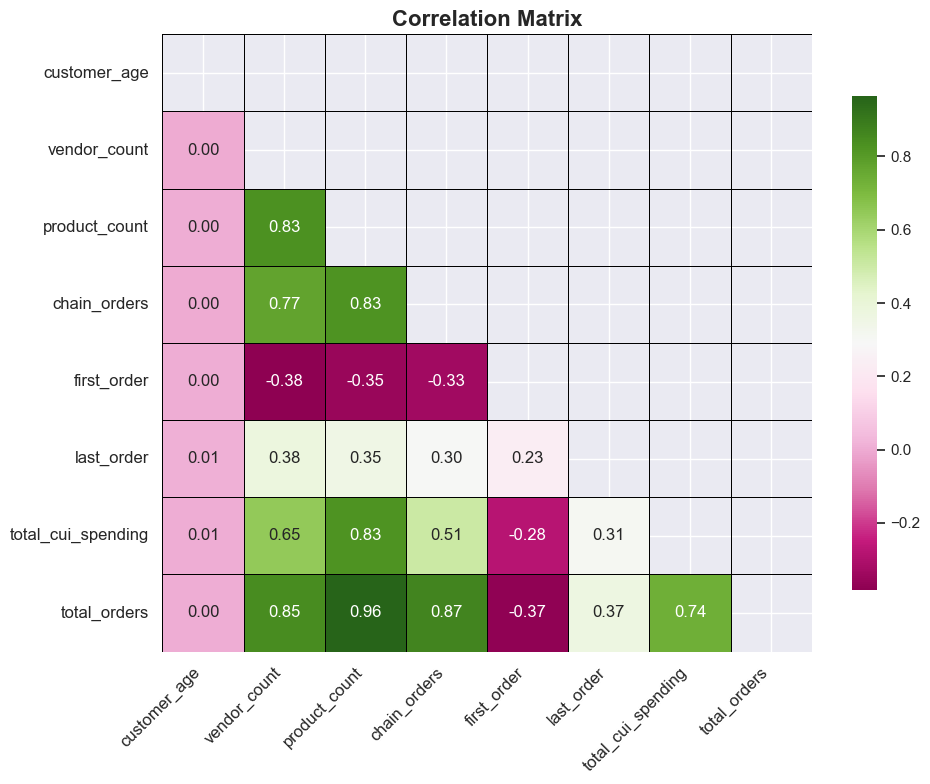

In [85]:
# Set the seaborn theme
sns.set()

# Create a correlation matrix
correlation_matrix = df_visualizations[metric_features_excluding_cui_dow_and_hr].corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            mask=mask, 
            annot=True, 
            cmap='PiYG', 
            fmt=".2f", 
            linewidths=0.5,  # Add lines between cells for clarity
            linecolor='black',  # Color of the lines
            cbar_kws={"shrink": .8})  # Adjust colorbar size

# Set labels and title
plt.title('Correlation Matrix', fontsize=16, weight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x labels for better readability
plt.yticks(rotation=0, fontsize=12)  # Keep y labels horizontal

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

> ## 4.8. Outliers <a class="anchor" id="outliers"></a>
[Back to 4. Exploring the Dataset](#exploration)<br>

In [86]:
df_outliers = df_visualizations.copy()

In [87]:
from pylab import rcParams
rcParams["figure.figsize"] = 25, 15

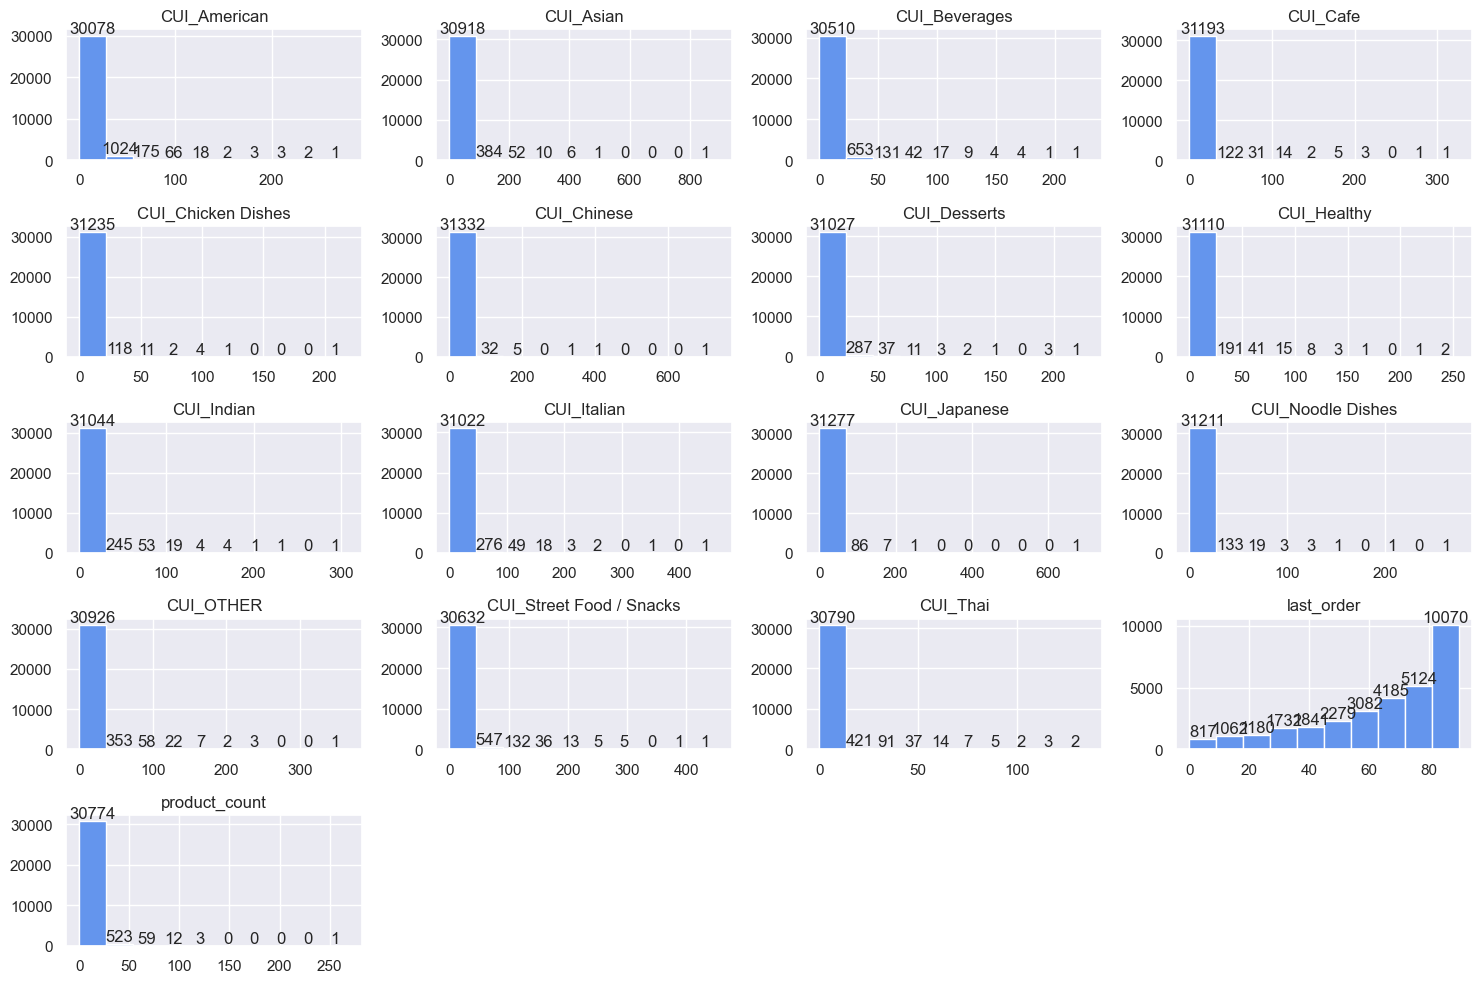

In [88]:
import matplotlib.pyplot as plt

# Plot the histograms for each column
axes = df_outliers[["CUI_American", "CUI_Asian", "CUI_Beverages", "CUI_Cafe",
                "CUI_Chicken Dishes", "CUI_Chinese", "CUI_Desserts", "CUI_Healthy",
                "CUI_Indian", "CUI_Italian", "CUI_Japanese", "CUI_Noodle Dishes",
                "CUI_OTHER", "CUI_Street Food / Snacks", "CUI_Thai","last_order","product_count"]].hist(color="cornflowerblue", figsize=(15, 10))

# Loop through each subplot
for ax in axes.flatten():
    for patch in ax.patches:
        # Get the height of each bar (the count)
        height = patch.get_height()
        # Place text above each bar
        ax.text(patch.get_x() + patch.get_width() / 2, height + 1,  # Offset text slightly above the bar
                f"{int(height)}", ha="center", va="bottom")

plt.tight_layout()
plt.show()


Since almost every graph shows an outlier, let’s determine if this customer has high spending across all categories or if they differ significantly in specific Cui features

In [89]:
df_temp= df_outliers[df_outliers["CUI_Asian"]>600]
df_temp[["CUI_American", "CUI_Asian", "CUI_Beverages", "CUI_Cafe",
                "CUI_Chicken Dishes", "CUI_Chinese", "CUI_Desserts", "CUI_Healthy",
                "CUI_Indian", "CUI_Italian", "CUI_Japanese", "CUI_Noodle Dishes",
                "CUI_OTHER", "CUI_Street Food / Snacks", "CUI_Thai"]]

,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai
customer_id,,,,,,,,,,,,,,,
249ba584d3,0.0,896.71,0.0,9.08,0.0,0.0,0.0,0.0,0.0,2.07,0.0,0.0,0.0,0.0,0.0


In [90]:
df_temp= df_outliers[df_outliers["CUI_American"]>200]
df_temp[["CUI_American", "CUI_Asian", "CUI_Beverages", "CUI_Cafe",
                "CUI_Chicken Dishes", "CUI_Chinese", "CUI_Desserts", "CUI_Healthy",
                "CUI_Indian", "CUI_Italian", "CUI_Japanese", "CUI_Noodle Dishes",
                "CUI_OTHER", "CUI_Street Food / Snacks", "CUI_Thai"]]

,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai
customer_id,,,,,,,,,,,,,,,
e3d7150447,216.44,9.40,0.00,185.73,0.0,0.0,0.0,8.6,0.0,12.44,0.0,0.0,132.66,0.00,0.00
9b7035b6a3,223.93,395.70,18.56,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,60.29,0.00
d5f32ee976,231.75,11.92,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,6.25,0.00
4f75dc005b,280.21,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,12.43
c105adcd06,225.11,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00


In [91]:
df_temp= df_outliers[df_outliers["CUI_Chinese"]>500]
df_temp[["CUI_American", "CUI_Asian", "CUI_Beverages", "CUI_Cafe",
                "CUI_Chicken Dishes", "CUI_Chinese", "CUI_Desserts", "CUI_Healthy",
                "CUI_Indian", "CUI_Italian", "CUI_Japanese", "CUI_Noodle Dishes",
                "CUI_OTHER", "CUI_Street Food / Snacks", "CUI_Thai"]]

,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai
customer_id,,,,,,,,,,,,,,,
92ced2dcb9,19.08,70.01,37.92,18.3,0.0,739.73,0.0,0.0,0.0,20.11,84.05,197.84,109.31,12.34,109.64


As we can see its different customers, so idk if we should remove.

In [92]:
# axes = df_outliers[["customer_region", "customer_age", "vendor_count", "weekend_orders", "weekday_orders", "orders_dawn","orders_morning", "orders_afternoon", "orders_evening",
#        "Healthiness_Index","is_chain"]].hist( color="cornflowerblue")

# # Loop through each subplot
# for ax in axes.flatten():
#     for patch in ax.patches:
#         # Get the height of each bar (the count)
#         height = patch.get_height()
#         # Place text above each bar
#         ax.text(patch.get_x() + patch.get_width() / 2, height + 1,  # Offset text slightly above the bar
#                 f"{int(height)}", ha="center", va="bottom")

# plt.tight_layout()
# plt.show()

In [93]:
# df_outliers[df_outliers["orders_morning"]>50]

In [94]:
# df_outliers.columns

In [95]:
# import seaborn as sns

# # Function to create a bar plot with counts above each bar
# def plot_bar_with_counts(column, title):
#     plt.figure(figsize=(10, 4))
#     ax = sns.countplot(data=df_outliers, x=column, palette="Set3")
#     plt.title(title)
#     plt.ylabel("Count")
    
#     # Add count annotations above each bar
#     for p in ax.patches:
#         ax.annotate(f"{int(p.get_height())}", 
#                     (p.get_x() + p.get_width() / 2, p.get_height()), 
#                     ha="center", va="bottom", fontsize=12, color="black", xytext=(0, 5), 
#                     textcoords="offset points")

#     plt.show()

# # Plot bar charts with counts
# plot_bar_with_counts("generation", "Distribution of Generation")
# plot_bar_with_counts("last_promo", "Distribution of Last Promo")
# plot_bar_with_counts("payment_method", "Distribution of Payment Method")
# plot_bar_with_counts("used_last_promo", "Distribution of Used last Promo")
# plot_bar_with_counts("customer_region", "Distribution of Customer Region")

<a id = "feature_engineering"></a>

## 5. Feature Engineering <a class="anchor" id="feature_engineering"></a>
[Back to ToC](#toc)<br>

In [96]:
df_new_features = df_outliers.copy()
df_new_features.columns

Index(['customer_region', 'customer_age', 'vendor_count', 'product_count',
       'chain_orders', 'first_order', 'last_order', 'last_promo',
       'payment_method', 'CUI_American', 'CUI_Asian', 'CUI_Beverages',
       'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts',
       'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese',
       'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks',
       'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5',
       'DOW_6', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8',
       'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16',
       'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23',
       'total_cui_spending', 'total_orders'],
      dtype='object')

> ## 5.1. Generation <a class="anchor" id="generation"></a>
[Back to 5. Feature Engineering](#feature_engineering)<br>

Create a categorical feature that groups customers by generation

In [97]:
# Define bins and labels for the generation categories
bins = [18, 25, 41, 57, 76, 81]  # Bins must be set as one more than the number of categories
labels = ["Gen_Z", "Millennials", "Gen_X", "Baby_Boomers", "Silent_Generation"]

# Step 1: Create a new column for generation based on customer_age
df_new_features["generation"] = pd.cut(df_new_features["customer_age"], bins=bins, labels=labels)

In [98]:
round(df_new_features['generation'].value_counts(normalize=True) * 100, 2)

generation
Millennials          50.66
Gen_Z                44.44
Gen_X                 4.50
Baby_Boomers          0.36
Silent_Generation     0.04
Name: proportion, dtype: float64

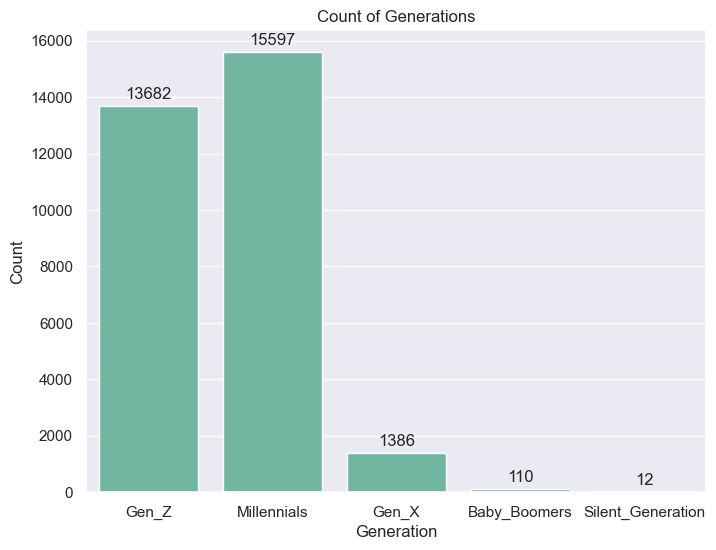

In [ ]:
sns.set_palette(color_palette)

# Count plot for 'generation' with total counts displayed
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='generation', data=df_new_features, order=labels)
plt.title("Count of Generations")
plt.xlabel("Generation")
plt.ylabel("Count")

# Add total counts above each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3)
plt.show()

> ## 5.2. Total Cuisine Spending <a class="anchor" id="total_cuisine_spending"></a>
[Back to 5. Feature Engineering](#feature_engineering)<br>

Estimate the customer lifetime value based on the total spending across all cuisines.

In [100]:
# Sum these columns row-wise and create a new column "CUI_all"
df_new_features["total_cui_spending"] = df_new_features[cui_columns].sum(axis=1)

In [101]:
df_new_features["total_cui_spending"].describe().round(2)

count    31372.00
mean        38.10
std         45.81
min          0.00
25%         12.89
50%         24.12
75%         44.86
max       1418.33
Name: total_cui_spending, dtype: float64

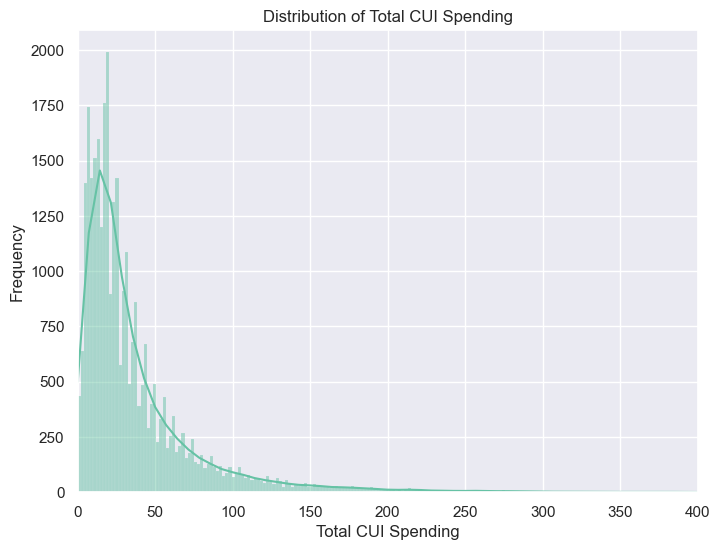

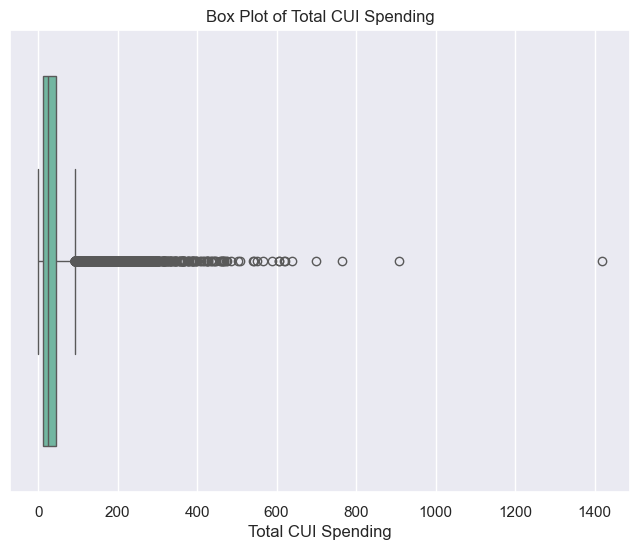

In [102]:


# Histogram for 'Total_cui_spending'
plt.figure(figsize=(8, 6))
sns.histplot(df_new_features['total_cui_spending'], kde=True)
plt.xlim(left = 0, right= 400)
plt.title("Distribution of Total CUI Spending")
plt.xlabel("Total CUI Spending")
plt.ylabel("Frequency")
plt.show()

# Horizontal box plot for 'Total_cui_spending'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_new_features['total_cui_spending'])
plt.title("Box Plot of Total CUI Spending")
plt.xlabel("Total CUI Spending")
plt.show()

> ## 5.3. Healthiness Index <a class="anchor" id="healthiness_index"></a>
[Back to 5. Feature Engineering](#feature_engineering)<br>

In [103]:
df_new_features["health_index"] = df_new_features["CUI_Healthy"] / df_new_features["total_cui_spending"]

In [104]:
df_new_features["health_index"].describe().round(2)

count    31236.00
mean         0.03
std          0.12
min          0.00
25%          0.00
50%          0.00
75%          0.00
max          1.00
Name: health_index, dtype: float64

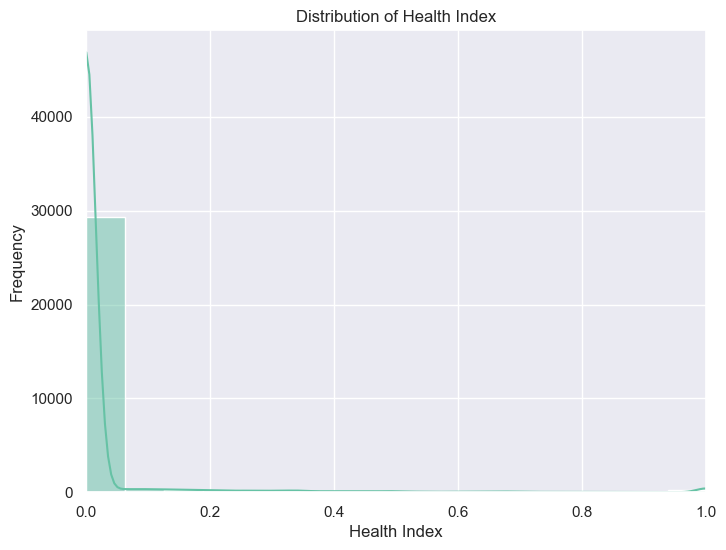

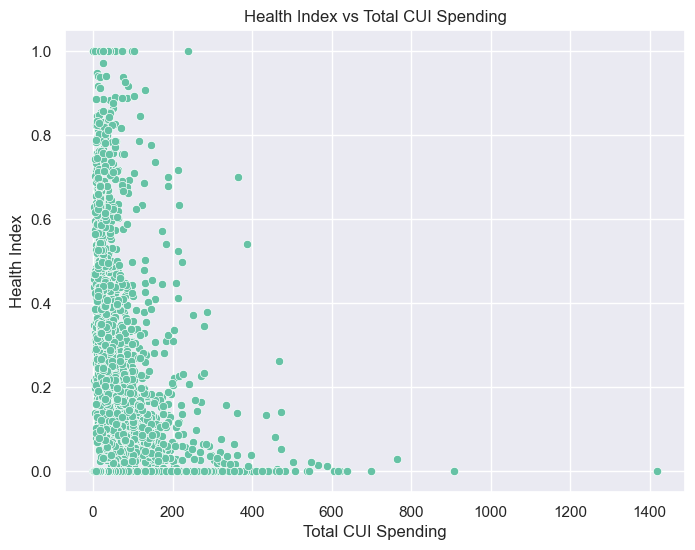

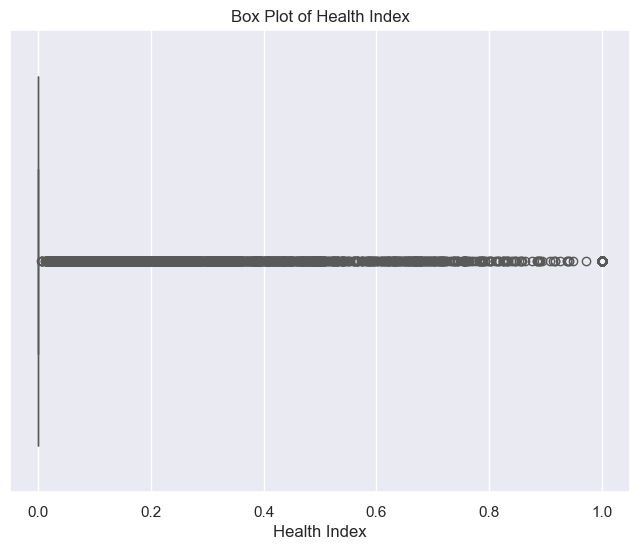

In [137]:
# Histogram for 'health_index'
plt.figure(figsize=(8, 6))
sns.histplot(df_new_features['health_index'], kde=True)
plt.title("Distribution of Health Index")
plt.xlabel("Health Index")
plt.xlim(0,1)
plt.ylabel("Frequency")
plt.show()

# Scatter plot for 'health_index' vs 'total_cui_spending'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_cui_spending', y='health_index', data=df_new_features)
plt.title("Health Index vs Total CUI Spending")
plt.xlabel("Total CUI Spending")
plt.ylabel("Health Index")
plt.show()

# Box plot for 'health_index'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_new_features['health_index'])
plt.title("Box Plot of Health Index")
plt.xlabel("Health Index")
plt.show()

> ## 5.4. Weekend and Weekday Orders <a class="anchor" id="weekend_and_weekday_orders"></a>
[Back to 5. Feature Engineering](#feature_engineering)<br>

Create a feature to indicate the number of orders placed during the weekend (Saturday and Sunday) versus weekdays.

In [106]:
# Create a column for weekend orders (DOW_0 and DOW_6)
df_new_features["weekend_orders"] = df_new_features["DOW_0"] + df_new_features["DOW_6"]

# Create a column for weekday orders (DOW_1 to DOW_5)
df_new_features["weekday_orders"] = df_new_features.loc[:, "DOW_1":"DOW_5"].sum(axis=1)

In [107]:
df_new_features[["weekend_orders", "weekday_orders"]].describe().round(2)

,weekend_orders,weekday_orders
count,31372.00,31372.00
mean,1.25,3.09
std,1.75,3.72
min,0.00,0.00
25%,0.00,1.00
50%,1.00,2.00
75%,2.00,4.00
max,35.00,67.00


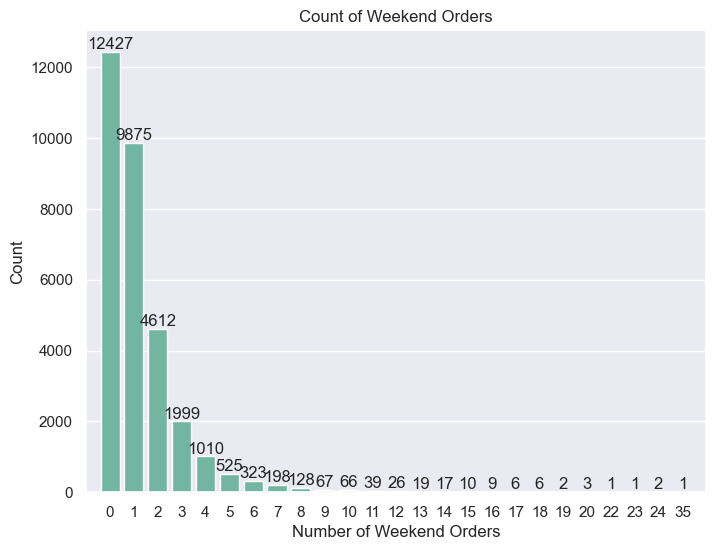

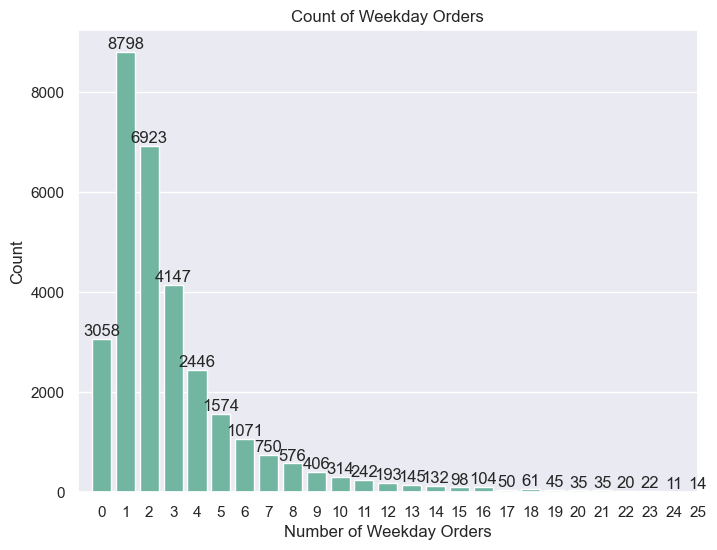

In [142]:
# Count plot for 'weekend_orders' with total counts displayed above each bar
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='weekend_orders', data=df_new_features)
plt.title("Count of Weekend Orders")
plt.xlabel("Number of Weekend Orders")
plt.ylabel("Count")
plt.xlim(left=-1, right=25)

# Add total count labels above each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.show()

# Count plot for 'weekday_orders' with total counts displayed above each bar
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='weekday_orders', data=df_new_features)
plt.title("Count of Weekday Orders")
plt.xlabel("Number of Weekday Orders")
plt.ylabel("Count")
plt.xlim(left=-1, right=25)

# Add total count labels above each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.show()


> ## 5.5. Hourly Orders Aggregation by Time of Day <a class="anchor" id="hourly_orders_aggregation"></a>
[Back to 5. Feature Engineering](#feature_engineering)<br>

In this section, we analyze the distribution of customer orders across different time periods throughout the day. The hourly order data, ranging from midnight (HR_0) to 11 PM (HR_23), is aggregated into four distinct periods: Dawn (12 AM - 5 AM), Morning (6 AM - 11 AM), Afternoon (12 PM - 5 PM), and Evening (6 PM - 11 PM)

In [109]:
# Define the hour ranges for each period
dawn_hours = df_new_features.loc[:, "HR_1":"HR_5"].sum(axis=1)  # HR_1 to HR_5
morning_hours = df_new_features.loc[:, "HR_6":"HR_11"].sum(axis=1)  # HR_6 to HR_11
afternoon_hours = df_new_features.loc[:, "HR_12":"HR_17"].sum(axis=1)  # HR_12 to HR_17
evening_hours = df_new_features.loc[:, "HR_18":"HR_23"].sum(axis=1)  # HR_18 to HR_23

# Create new columns for each period
df_new_features["orders_dawn"] = dawn_hours
df_new_features["orders_morning"] = morning_hours
df_new_features["orders_afternoon"] = afternoon_hours
df_new_features["orders_evening"] = evening_hours

In [110]:
df_new_features.loc[:, "orders_dawn":"orders_evening"].describe().round(2)

,orders_dawn,orders_morning,orders_afternoon,orders_evening
count,31372.00,31372.00,31372.00,31372.00
mean,0.41,1.22,1.79,0.89
std,1.14,2.21,2.72,1.90
min,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00
50%,0.00,1.00,1.00,0.00
75%,0.00,2.00,2.00,1.00
max,25.00,50.00,52.00,52.00


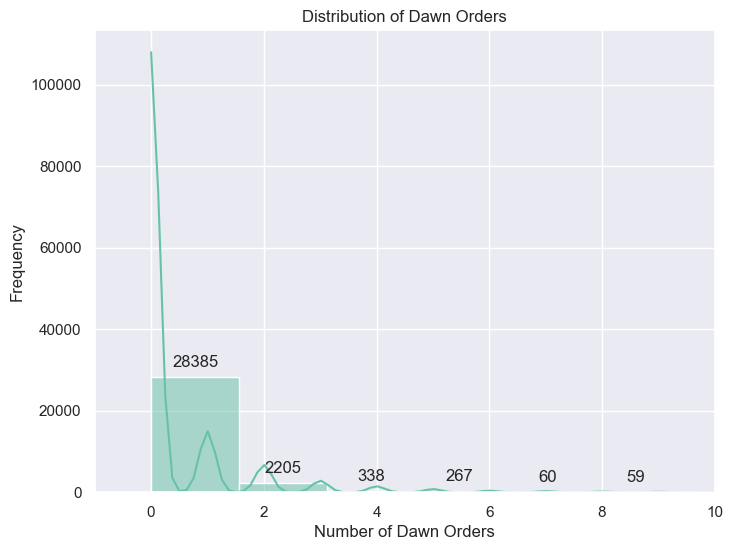

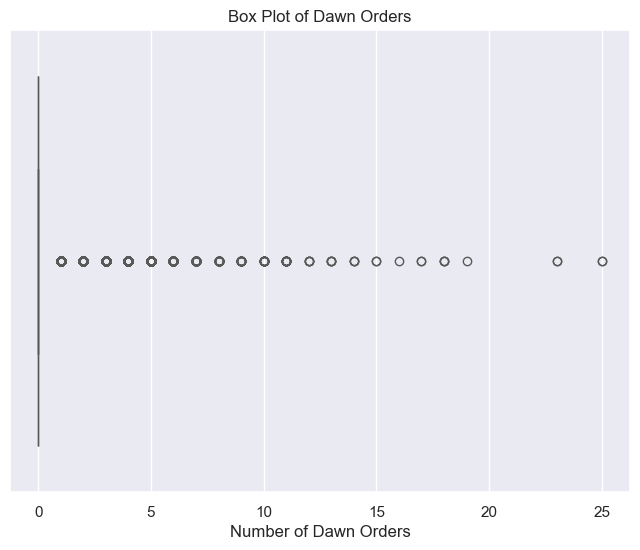

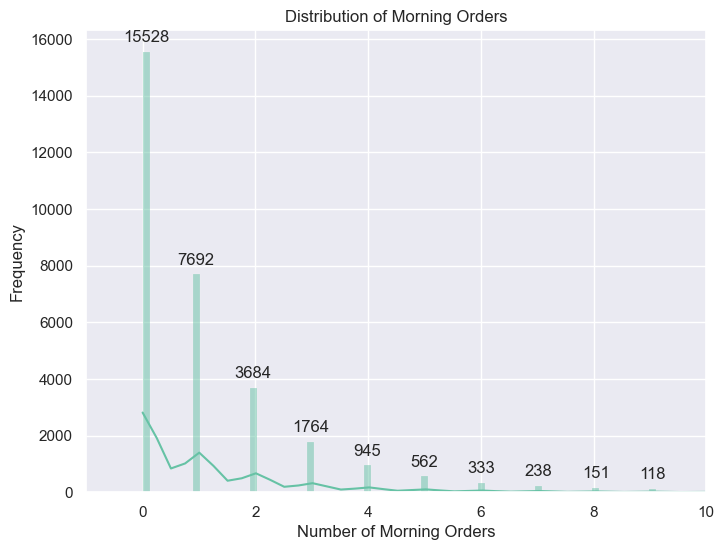

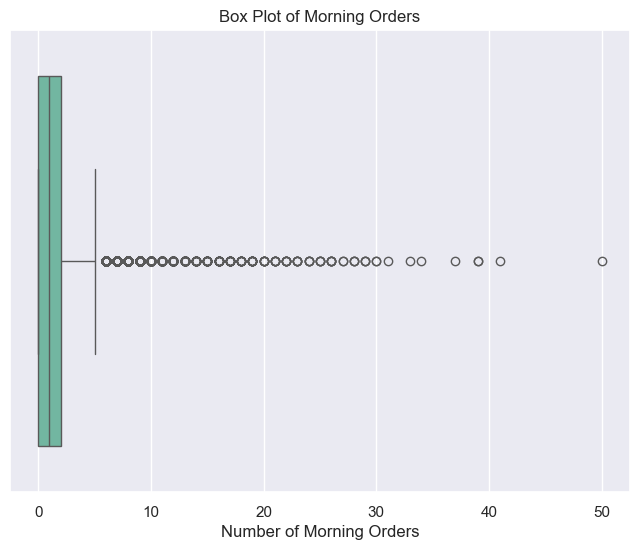

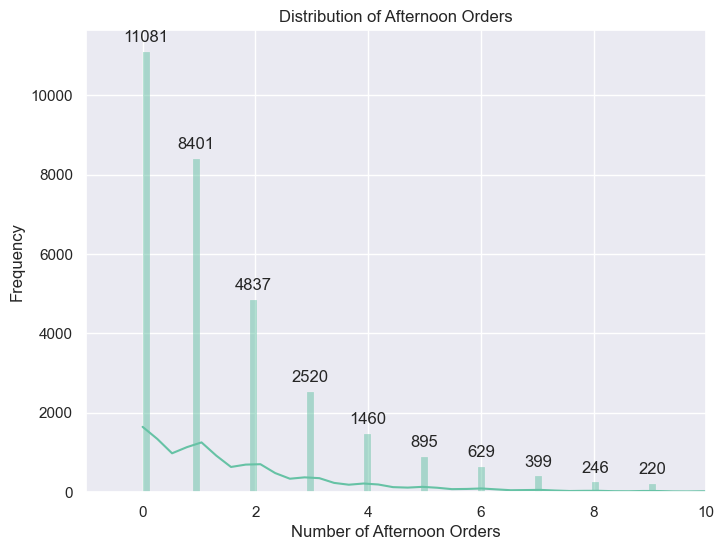

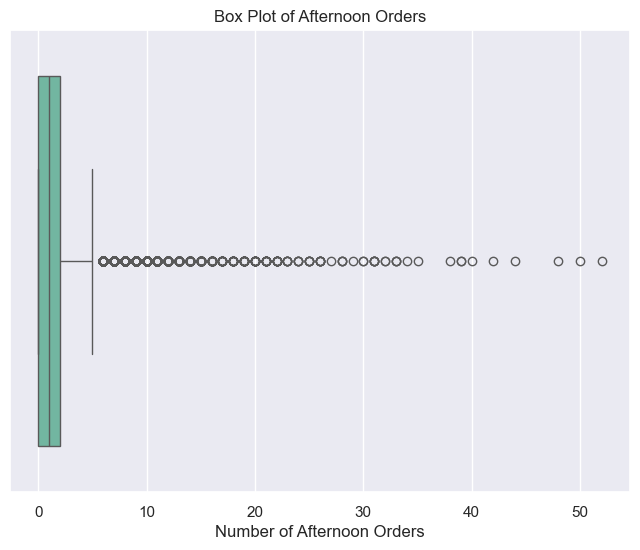

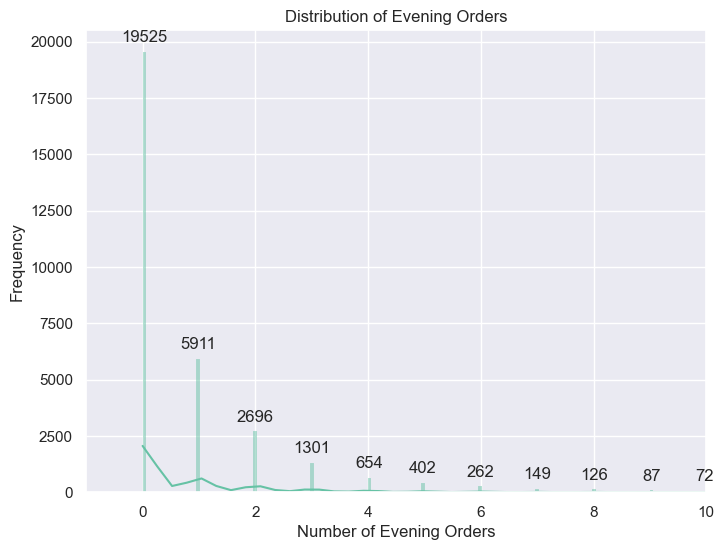

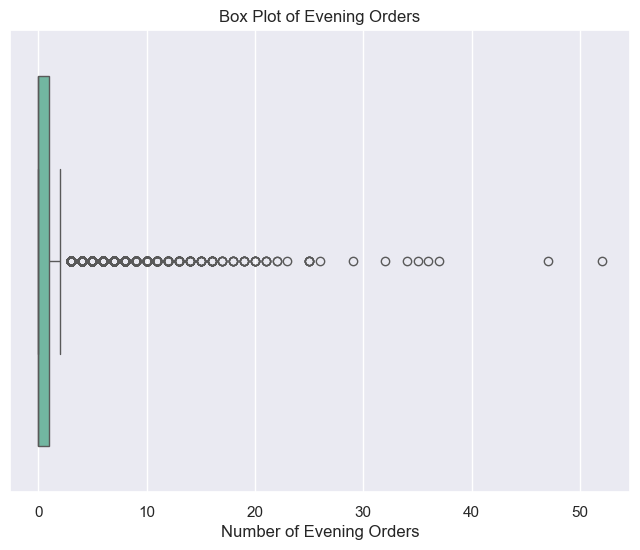

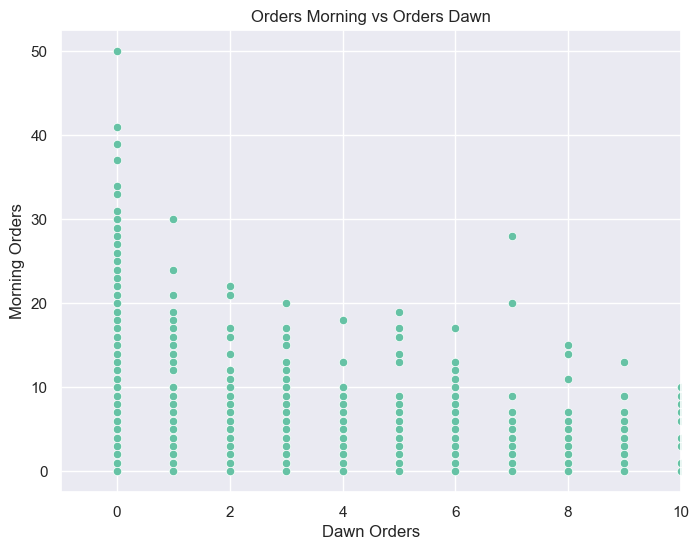

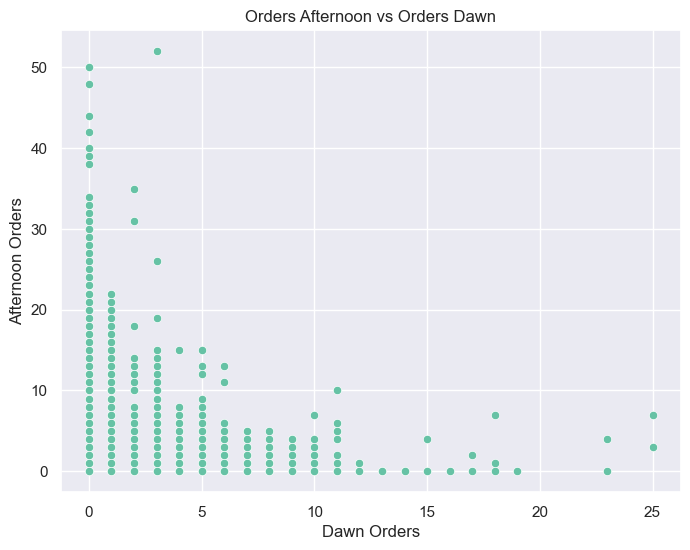

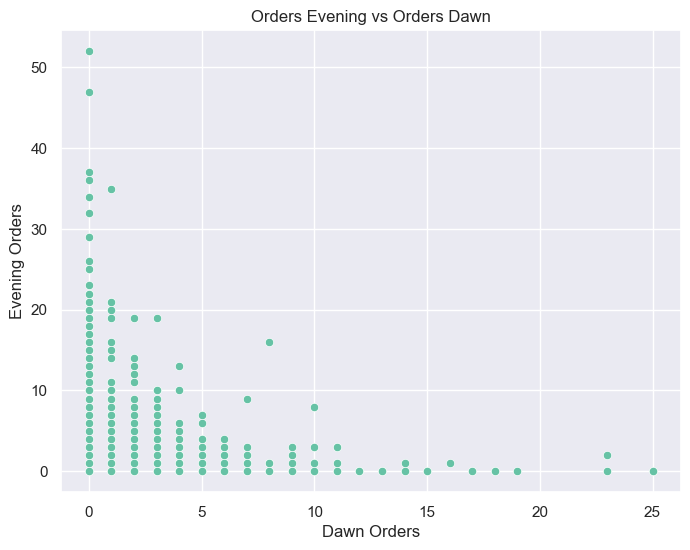

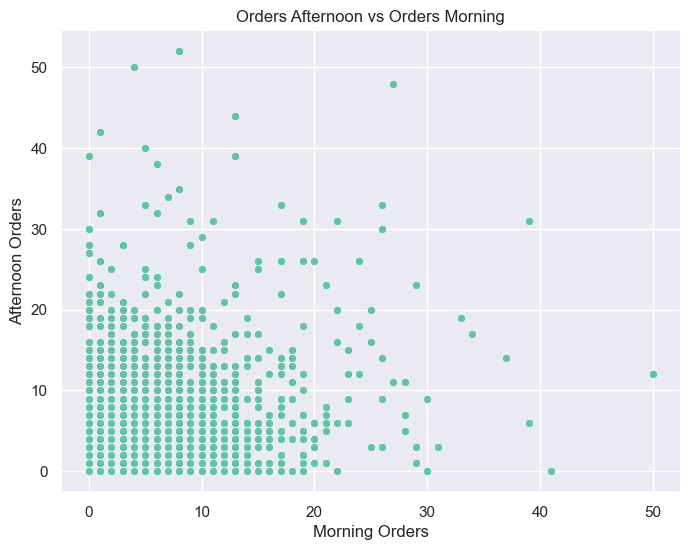

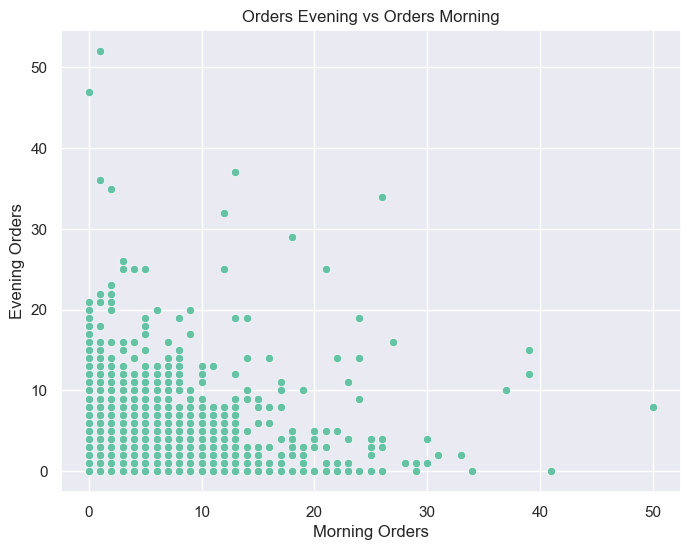

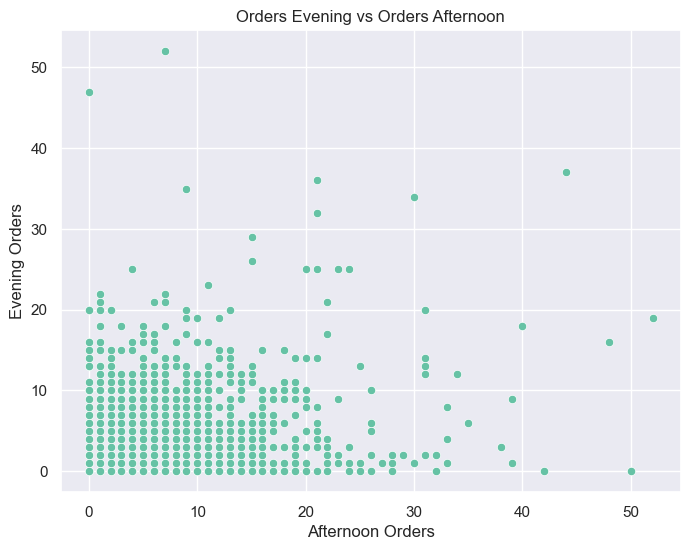

In [146]:

# Histogram for 'orders_dawn' with total counts displayed above each bar
plt.figure(figsize=(8, 6))
ax = sns.histplot(df_new_features['orders_dawn'], kde=True)
plt.title("Distribution of Dawn Orders")
plt.xlabel("Number of Dawn Orders")
plt.ylabel("Frequency")
plt.xlim(left=-1, right=10)

# Add total count labels above each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate bars with height > 0
        ax.annotate(f'{int(height)}', 
                    xy=(p.get_x() + p.get_width() / 2, height), 
                    xytext=(0, 5),  # Offset label position
                    textcoords="offset points", 
                    ha='center', va='bottom')

plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x=df_new_features['orders_dawn'])
plt.title("Box Plot of Dawn Orders")
plt.xlabel("Number of Dawn Orders")
plt.show()

# Histogram and Box Plot for 'orders_morning'
plt.figure(figsize=(8, 6))
ax = sns.histplot(df_new_features['orders_morning'], kde=True)
plt.title("Distribution of Morning Orders")
plt.xlabel("Number of Morning Orders")
plt.xlim(left = -1, right= 10)
plt.ylabel("Frequency")

# Add total count labels above each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate bars with height > 0
        ax.annotate(f'{int(height)}', 
                    xy=(p.get_x() + p.get_width() / 2, height), 
                    xytext=(0, 5),  # Offset label position
                    textcoords="offset points", 
                    ha='center', va='bottom')

plt.show()



plt.figure(figsize=(8, 6))
sns.boxplot(x=df_new_features['orders_morning'])
plt.title("Box Plot of Morning Orders")
plt.xlabel("Number of Morning Orders")
plt.show()

# Histogram and Box Plot for 'orders_afternoon'
plt.figure(figsize=(8, 6))
ax = sns.histplot(df_new_features['orders_afternoon'], kde=True)
plt.title("Distribution of Afternoon Orders")
plt.xlabel("Number of Afternoon Orders")
plt.xlim(left = -1, right= 10)
plt.ylabel("Frequency")

# Add total count labels above each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate bars with height > 0
        ax.annotate(f'{int(height)}', 
                    xy=(p.get_x() + p.get_width() / 2, height), 
                    xytext=(0, 5),  # Offset label position
                    textcoords="offset points", 
                    ha='center', va='bottom')

plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x=df_new_features['orders_afternoon'])
plt.title("Box Plot of Afternoon Orders")
plt.xlabel("Number of Afternoon Orders")
plt.show()

# Histogram and Box Plot for 'orders_evening'
plt.figure(figsize=(8, 6))
ax = sns.histplot(df_new_features['orders_evening'], kde=True)
plt.title("Distribution of Evening Orders")
plt.xlabel("Number of Evening Orders")
plt.xlim(left = -1, right= 10)
plt.ylabel("Frequency")

# Add total count labels above each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate bars with height > 0
        ax.annotate(f'{int(height)}', 
                    xy=(p.get_x() + p.get_width() / 2, height), 
                    xytext=(0, 5),  # Offset label position
                    textcoords="offset points", 
                    ha='center', va='bottom')

plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x=df_new_features['orders_evening'])
plt.title("Box Plot of Evening Orders")
plt.xlabel("Number of Evening Orders")
plt.show()

# Scatter Plots Comparing Different Order Times
plt.figure(figsize=(8, 6))
sns.scatterplot(x='orders_dawn', y='orders_morning', data=df_new_features)
plt.title("Orders Morning vs Orders Dawn")
plt.xlabel("Dawn Orders")
plt.xlim(left = -1, right= 10)
plt.ylabel("Morning Orders")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='orders_dawn', y='orders_afternoon', data=df_new_features)
plt.title("Orders Afternoon vs Orders Dawn")
plt.xlabel("Dawn Orders")
plt.ylabel("Afternoon Orders")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='orders_dawn', y='orders_evening', data=df_new_features)
plt.title("Orders Evening vs Orders Dawn")
plt.xlabel("Dawn Orders")
plt.ylabel("Evening Orders")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='orders_morning', y='orders_afternoon', data=df_new_features)
plt.title("Orders Afternoon vs Orders Morning")
plt.xlabel("Morning Orders")
plt.ylabel("Afternoon Orders")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='orders_morning', y='orders_evening', data=df_new_features)
plt.title("Orders Evening vs Orders Morning")
plt.xlabel("Morning Orders")
plt.ylabel("Evening Orders")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='orders_afternoon', y='orders_evening', data=df_new_features)
plt.title("Orders Evening vs Orders Afternoon")
plt.xlabel("Afternoon Orders")
plt.ylabel("Evening Orders")
plt.show()


> ## 5.6. Order Recency <a class="anchor" id="Order_Recency"></a>

Recency of the customer’s last order, normalized by the full time span covered in the dataset.

While last_order gives direct information, order_recency will simplify interpreting recency at a glance.

In [112]:
# calculate the recency of the last order: 1 being the most recent and 0 being the least recent
df_new_features["order_recency"] = df_new_features["last_order"] / df_new_features['last_order'].max()

In [113]:
df_new_features["order_recency"].describe().round(2)

count    31372.00
mean         0.71
std          0.26
min          0.00
25%          0.54
50%          0.78
75%          0.92
max          1.00
Name: order_recency, dtype: float64

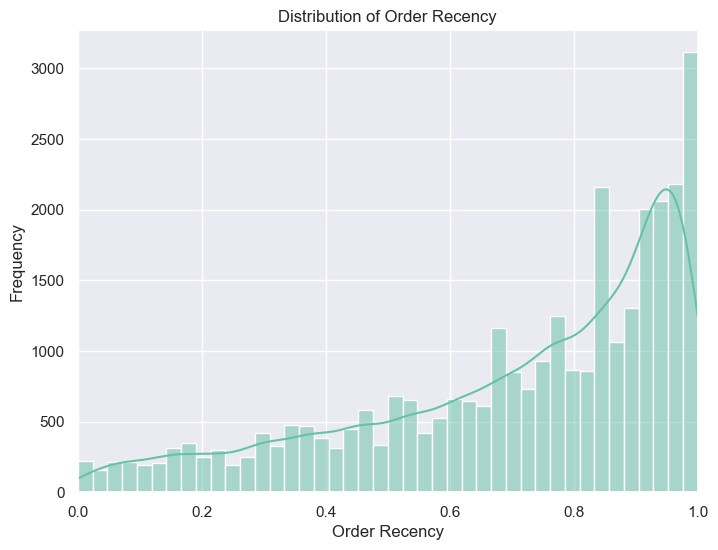

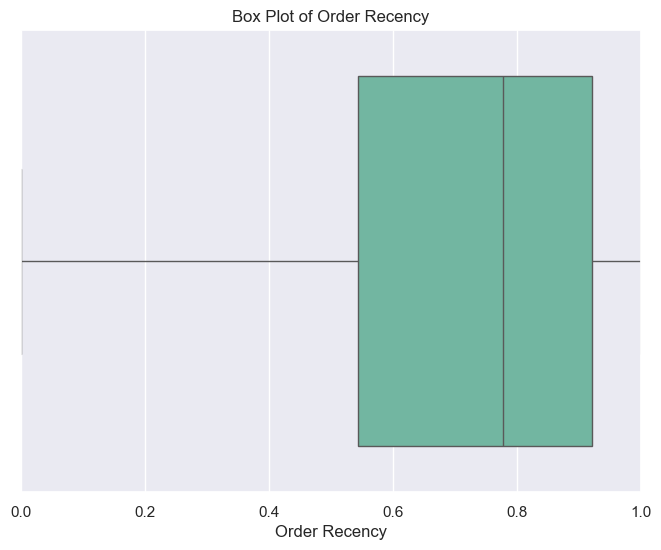

In [114]:


# Histogram for 'order_recency'
plt.figure(figsize=(8, 6))
sns.histplot(df_new_features['order_recency'], kde=True)
plt.title("Distribution of Order Recency")
plt.xlabel("Order Recency")
plt.ylabel("Frequency")
plt.xlim(0, 1)  # Set x-axis range from 0 to 1
plt.show()

# Box plot for 'order_recency'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_new_features['order_recency'])
plt.title("Box Plot of Order Recency")
plt.xlabel("Order Recency")
plt.xlim(0, 1)  # Set x-axis range from 0 to 1
plt.show()

> ## 5.7. Average Daily Orders <a class="anchor" id="Average_Daily_Orders"></a>

How frequently does the customer place an order? This could help distinguish regular customers from occasional ones.

In [115]:
# Calculate average daily orders based on the total dataset period (from first day to most recent order in the dataset)
df_new_features["avg_daily_orders"] = df_new_features["total_orders"] / df_new_features['last_order'].max()

In [116]:
df_new_features["avg_daily_orders"].describe().round(2)

count    31372.00
mean         0.05
std          0.06
min          0.00
25%          0.02
50%          0.03
75%          0.06
max          1.04
Name: avg_daily_orders, dtype: float64

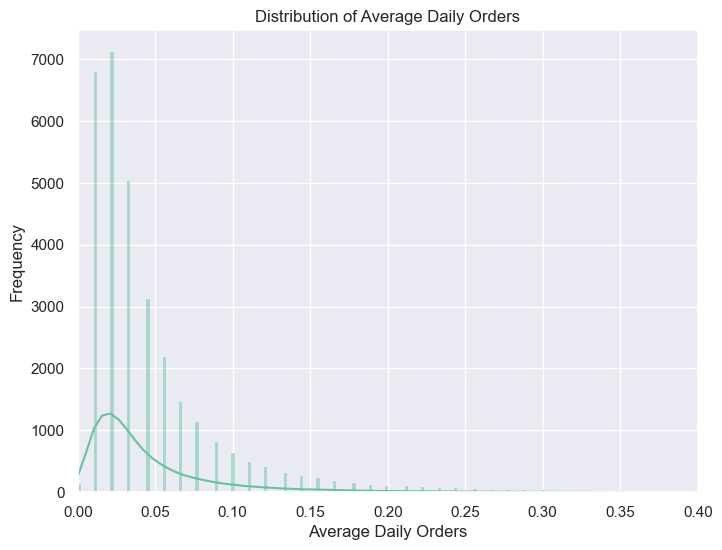

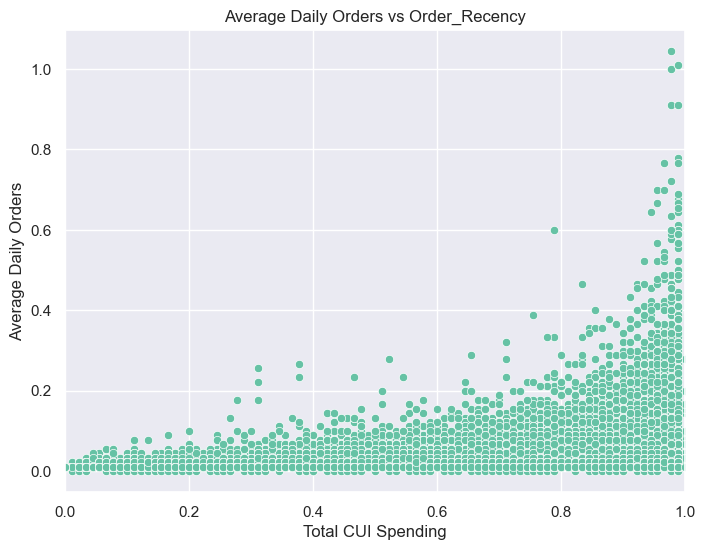

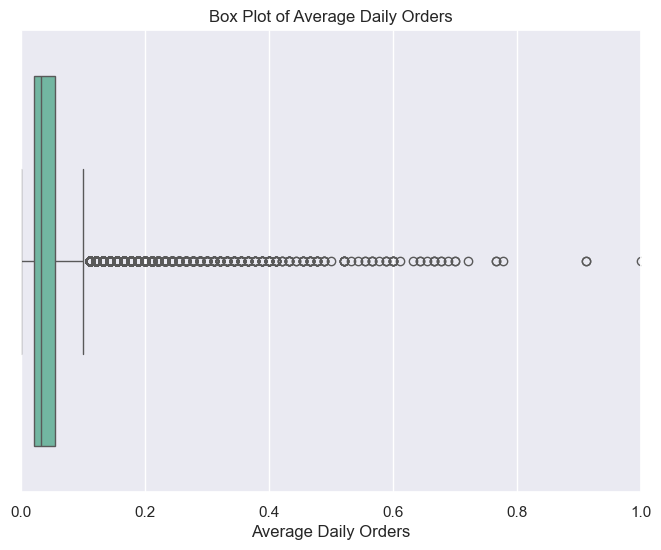

In [ ]:


# Histogram for 'avg_daily_orders'
plt.figure(figsize=(8, 6))
sns.histplot(df_new_features['avg_daily_orders'], kde=True)
plt.title("Distribution of Average Daily Orders")
plt.xlabel("Average Daily Orders")
plt.ylabel("Frequency")
plt.xlim(0, 0.4)  # Set x-axis range from 0 to 1
plt.show()

# Scatter plot for 'avg_daily_orders' vs 'total_cui_spending'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='order_recency', y='avg_daily_orders', data=df_new_features)
plt.title("Average Daily Orders vs Order_Recency")
plt.xlabel("Total CUI Spending")
plt.ylabel("Average Daily Orders")
plt.xlim(0, 1)  # Set x-axis range from 0 to 1
plt.show()

# Box plot for 'avg_daily_orders'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_new_features['avg_daily_orders'])
plt.title("Box Plot of Average Daily Orders")
plt.xlabel("Average Daily Orders")
plt.xlim(0, 1)  # Set x-axis range from 0 to 1
plt.show()

> ## 5.8. Average Order Value <a class="anchor" id="Average_Order_Value"></a>
This feature could help in identifying high-value customers who spend more per order.

In [118]:
df_new_features["avg_order_value"] = df_new_features["total_cui_spending"] / df_new_features["total_orders"]

In [119]:
df_new_features["avg_order_value"].describe().round(2)

count    31236.00
mean        10.31
std          7.86
min          0.37
25%          5.07
50%          8.22
75%         12.93
max        104.32
Name: avg_order_value, dtype: float64

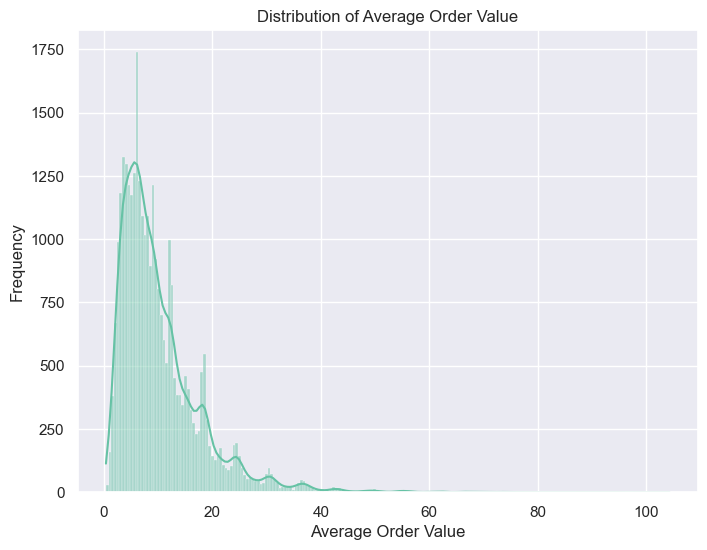

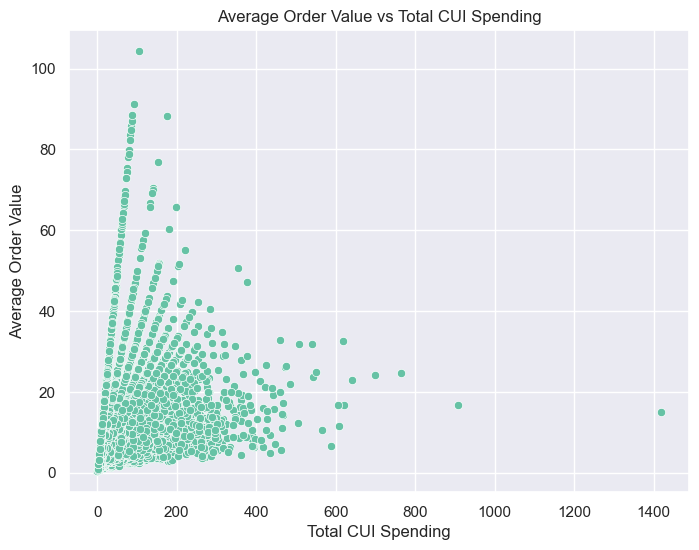

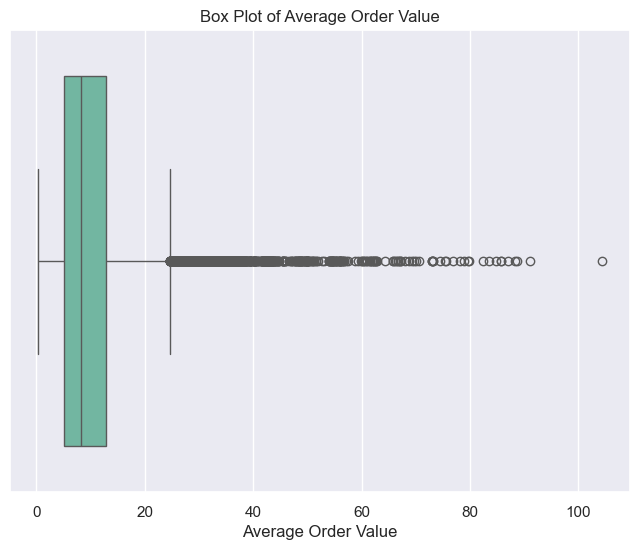

In [120]:


# Histogram for 'avg_order_value'
plt.figure(figsize=(8, 6))
sns.histplot(df_new_features['avg_order_value'], kde=True)
plt.title("Distribution of Average Order Value")
plt.xlabel("Average Order Value")
plt.ylabel("Frequency")
plt.show()

# Scatter plot for 'avg_order_value' vs 'total_cui_spending'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_cui_spending', y='avg_order_value', data=df_new_features)
plt.title("Average Order Value vs Total CUI Spending")
plt.xlabel("Total CUI Spending")
plt.ylabel("Average Order Value")
plt.show()

# Box plot for 'avg_order_value'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_new_features['avg_order_value'])
plt.title("Box Plot of Average Order Value")
plt.xlabel("Average Order Value")
plt.show()

> ## 5.9. Promotion Used Indicator <a class="anchor" id="last_promotion_indicator"></a>
[Back to 5. Feature Engineering](#feature_engineering)<br>

Create a binary feature indicating whether the customer used a promotion. This can be helpful for analysis on promotional effectiveness.

In [121]:
round(df_new_features['last_promo'].value_counts(normalize=True) * 100, 2)

last_promo
NOPROMO     52.51
DELIVERY    19.72
DISCOUNT    14.12
FREEBIE     13.65
Name: proportion, dtype: float64

In [122]:
# Indicates if a promotion was used based on the last_promo value
df_new_features['promo_used'] = (df_new_features['last_promo'] != 'NOPROMO').astype(int)

In [123]:
round(df_new_features['promo_used'].value_counts(normalize=True) * 100, 2)

promo_used
0    52.51
1    47.49
Name: proportion, dtype: float64

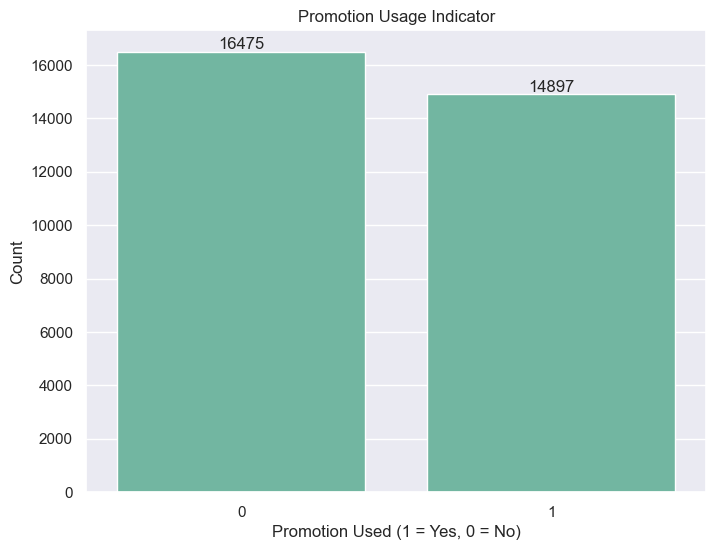

In [130]:
# Bar chart for 'promo_used' with total counts displayed inside the bars

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='promo_used', data=df_new_features)
plt.title("Promotion Usage Indicator")
plt.xlabel("Promotion Used (1 = Yes, 0 = No)")
plt.ylabel("Count")

# Add total count labels inside the bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.show()


> ## 5.10 Chain Orders Proportion <a class="anchor" id="Chain_Percentage_Chain_Customer"></a>

Tracks how much percentage of orders are Chain Restaurants

In [125]:
# Calculate the proportion of orders that are from chain vendors (handling potential division by zero)
df_new_features['chain_orders_prop'] = df_new_features['chain_orders'] / df_new_features['total_orders'].replace(0, np.nan)

In [126]:
df_new_features["chain_orders_prop"].describe().round(2)

count    31236.00
mean         0.63
std          0.39
min          0.00
25%          0.33
50%          0.72
75%          1.00
max          1.00
Name: chain_orders_prop, dtype: float64

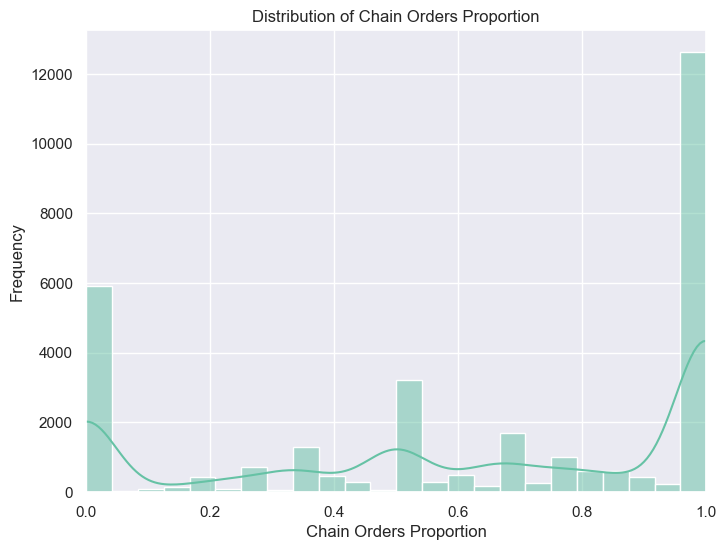

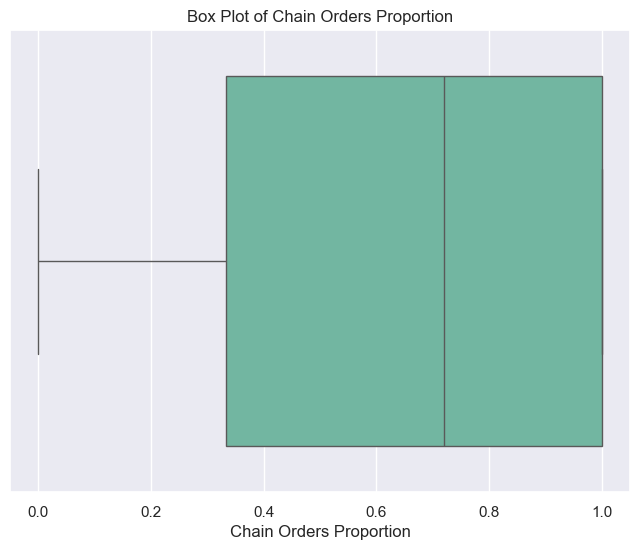

In [127]:
# Histogram for 'chain_orders_prop'
plt.figure(figsize=(8, 6))
sns.histplot(df_new_features['chain_orders_prop'], kde=True)
plt.title("Distribution of Chain Orders Proportion")
plt.xlabel("Chain Orders Proportion")
plt.ylabel("Frequency")
plt.xlim(0, 1)  # Set x-axis range from 0 to 1
plt.show()

# Box plot for 'chain_orders_prop'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_new_features['chain_orders_prop'])
plt.title("Box Plot of Chain Orders Proportion")
plt.xlabel("Chain Orders Proportion")
plt.show()

> ## 5.11 Cities <a class="anchor" id="cities"></a>

Grouping of customer_regions into cities based on the findings and assumptions that the customer_region represents postal codes. And therefore customer_regions with the same prefix number belong to the same city.

In [128]:
# Extract the prefix from the 'customer_region' column
df_new_features['city'] = df_new_features['customer_region'].str[:1]

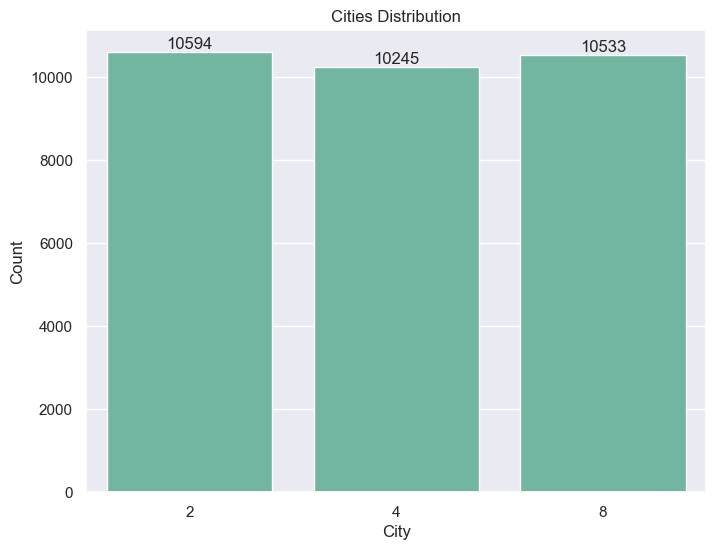

In [129]:
# Bar chart for 'promo_used' with total counts displayed inside the bars
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='city', data=df_new_features)
plt.title("Cities Distribution")
plt.xlabel("City")
plt.ylabel("Count")

# Add total count labels inside the bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.show()